# Avocado Project

# Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

    •	Date - The date of the observation

    •	AveragePrice - the average price of a single avocado

    •	type - conventional or organic

    •	year - the year

    •	Region - the city or region of the observation

    •	Total Volume - Total number of avocados sold

    •	4046 - Total number of avocados with PLU 4046 sold

    •	4225 - Total number of avocados with PLU 4225 sold

    •	4770 - Total number of avocados with PLU 4770 sold


# Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 


# Dataset Link-

•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

# Answer:-

Here you can see there are two problems: 
    
1) Have to predict region using classification and 2) Have to predict average price using Regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"D:\data trained\Flip Robo\Practice projects\Data set used for Avocado project\avocado.csv")
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

**Here you can see a column name Unnamed it's a useless column so I am going to delete it.Lets delete the Unnamed column:**

In [3]:
#Droping the Unnamed: column 
df.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
df.head(2)

Date  AveragePrice  Total Volume     4046      4225   4770  \
0  2015-12-27          1.33      64236.62  1036.74  54454.85  48.16   
1  2015-12-20          1.35      54876.98   674.28  44638.81  58.33   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany

**So here you can see the Unnamed: column is deleted.**

# Exploratory Data Analysis(EDA)

In [5]:
#Checking the dimension of the dataset
df.shape

(18249, 13)

**Here you can see 18249 rows and 13 columns are present in our dataset**

In [6]:
#Checking every column names 
df.columns.to_list()

['Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

In [7]:
#Checking for duplicated row in the Dataset
df.duplicated().sum()

0

**Here you can see there is no duplicated row.**

In [8]:
#Checking the data type of each columns
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [9]:
#Checking info of every columns of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


**Observation:-**

* 1) Here you can see 9 columns contains Float values,1 column has the integer value and 3 columns has object means strings values.*

* 2) This dataset takes 1.8+ MB memory.

* 3) <class 'pandas.core.frame.DataFrame'> indecates that it's the details about the DataFrame.*

* 4) Here no null value is present in any columns.*

* 5) Here you can see the Date column has object means strings datatype but it should be Datetime data type so I will change it.*

In [10]:
#Checking the data type of Date column
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d") # Here capital Y indicates more that 2 degit year value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


**Observation:-**

*1) Here you can see Date column's data type has changes to datetime type.*

*2) Here it's a demontration how you can change a string type Date column into a actual datetype type column.*

*3) Date column is not an important column to predict Region so I can delete this column.*

In [11]:
#Deleting the Date column
df.drop("Date",axis=1,inplace=True)

In [12]:
df.head(1)

AveragePrice  Total Volume     4046      4225   4770  Total Bags  \
0          1.33      64236.62  1036.74  54454.85  48.16     8696.87   

   Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8603.62       93.25          0.0  conventional  2015  Albany

**Here you can see the Date column is deleted.**

In [13]:
#Checking null value for each column
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

**Here you can see no nulll value is present.**

<Axes: >

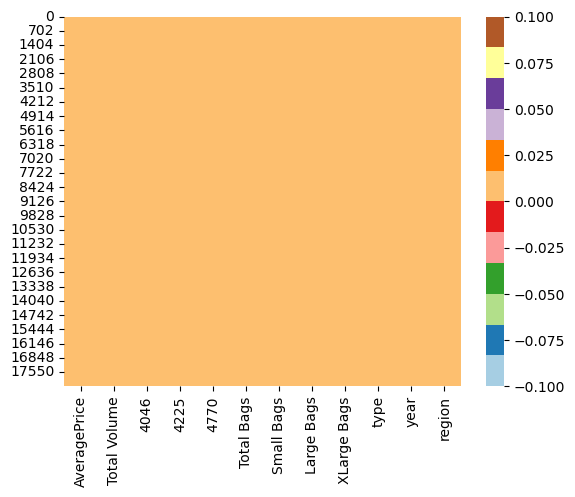

In [14]:
#Lets visualize null value using heatmap
sns.heatmap(df.isnull(),cmap="Paired")

**No null value is present.**

In [15]:
#Checking unique values for each columns
df.nunique().to_frame("Unique value count")

Unique value count
AveragePrice                 259
Total Volume               18237
4046                       17702
4225                       18103
4770                       12071
Total Bags                 18097
Small Bags                 17321
Large Bags                 15082
XLarge Bags                 5588
type                           2
year                           4
region                        54

**Obesrvation:-**
    
*1) Our Target column is region and it's difference between it's value counts with it's unique value counts is very high so I can clearly consider it's a Classification problem.*

In [16]:
#Value counts for each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64


0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64


0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
378155.00     1
2356.13       1
Name: 4225, Length: 18103, dtype: int64


0.00      5497
2.66         7
3.32         7
10.97        6
1.59         6
          ... 
547.08       1
155.87       1
72.01        1
128.06       1
224.53       1
Name

**Observation:-**

Here columns have numeric datatypes so I don't have to use any encoding techniques.

In [17]:
#Checking description of Dataset
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

**Observation:-**

*1) For columns "4046","Total Bags","Small Bags","XLarge Bags" these column's median(50%) values are greater than mean ,that means these columns values are left skewed.*

*2) Apart form the column names those are I mentioned above has higher mean value than Midean(50%) that means these column's data has right skewed.*

*3) We can see there is high difference between 75 percentile and Max for "AveragePrice","Total Volume","4770","Small Bags","Large Bags","XLarge Bags" that means these columns might have outliers.*

*4) Here you can see some columns are missing because they are categorical columns and that's why we can not see their statstical data.*

# Data Visualization:-

**Uni-variate analysis**

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

Text(0.5, 0, 'Region')

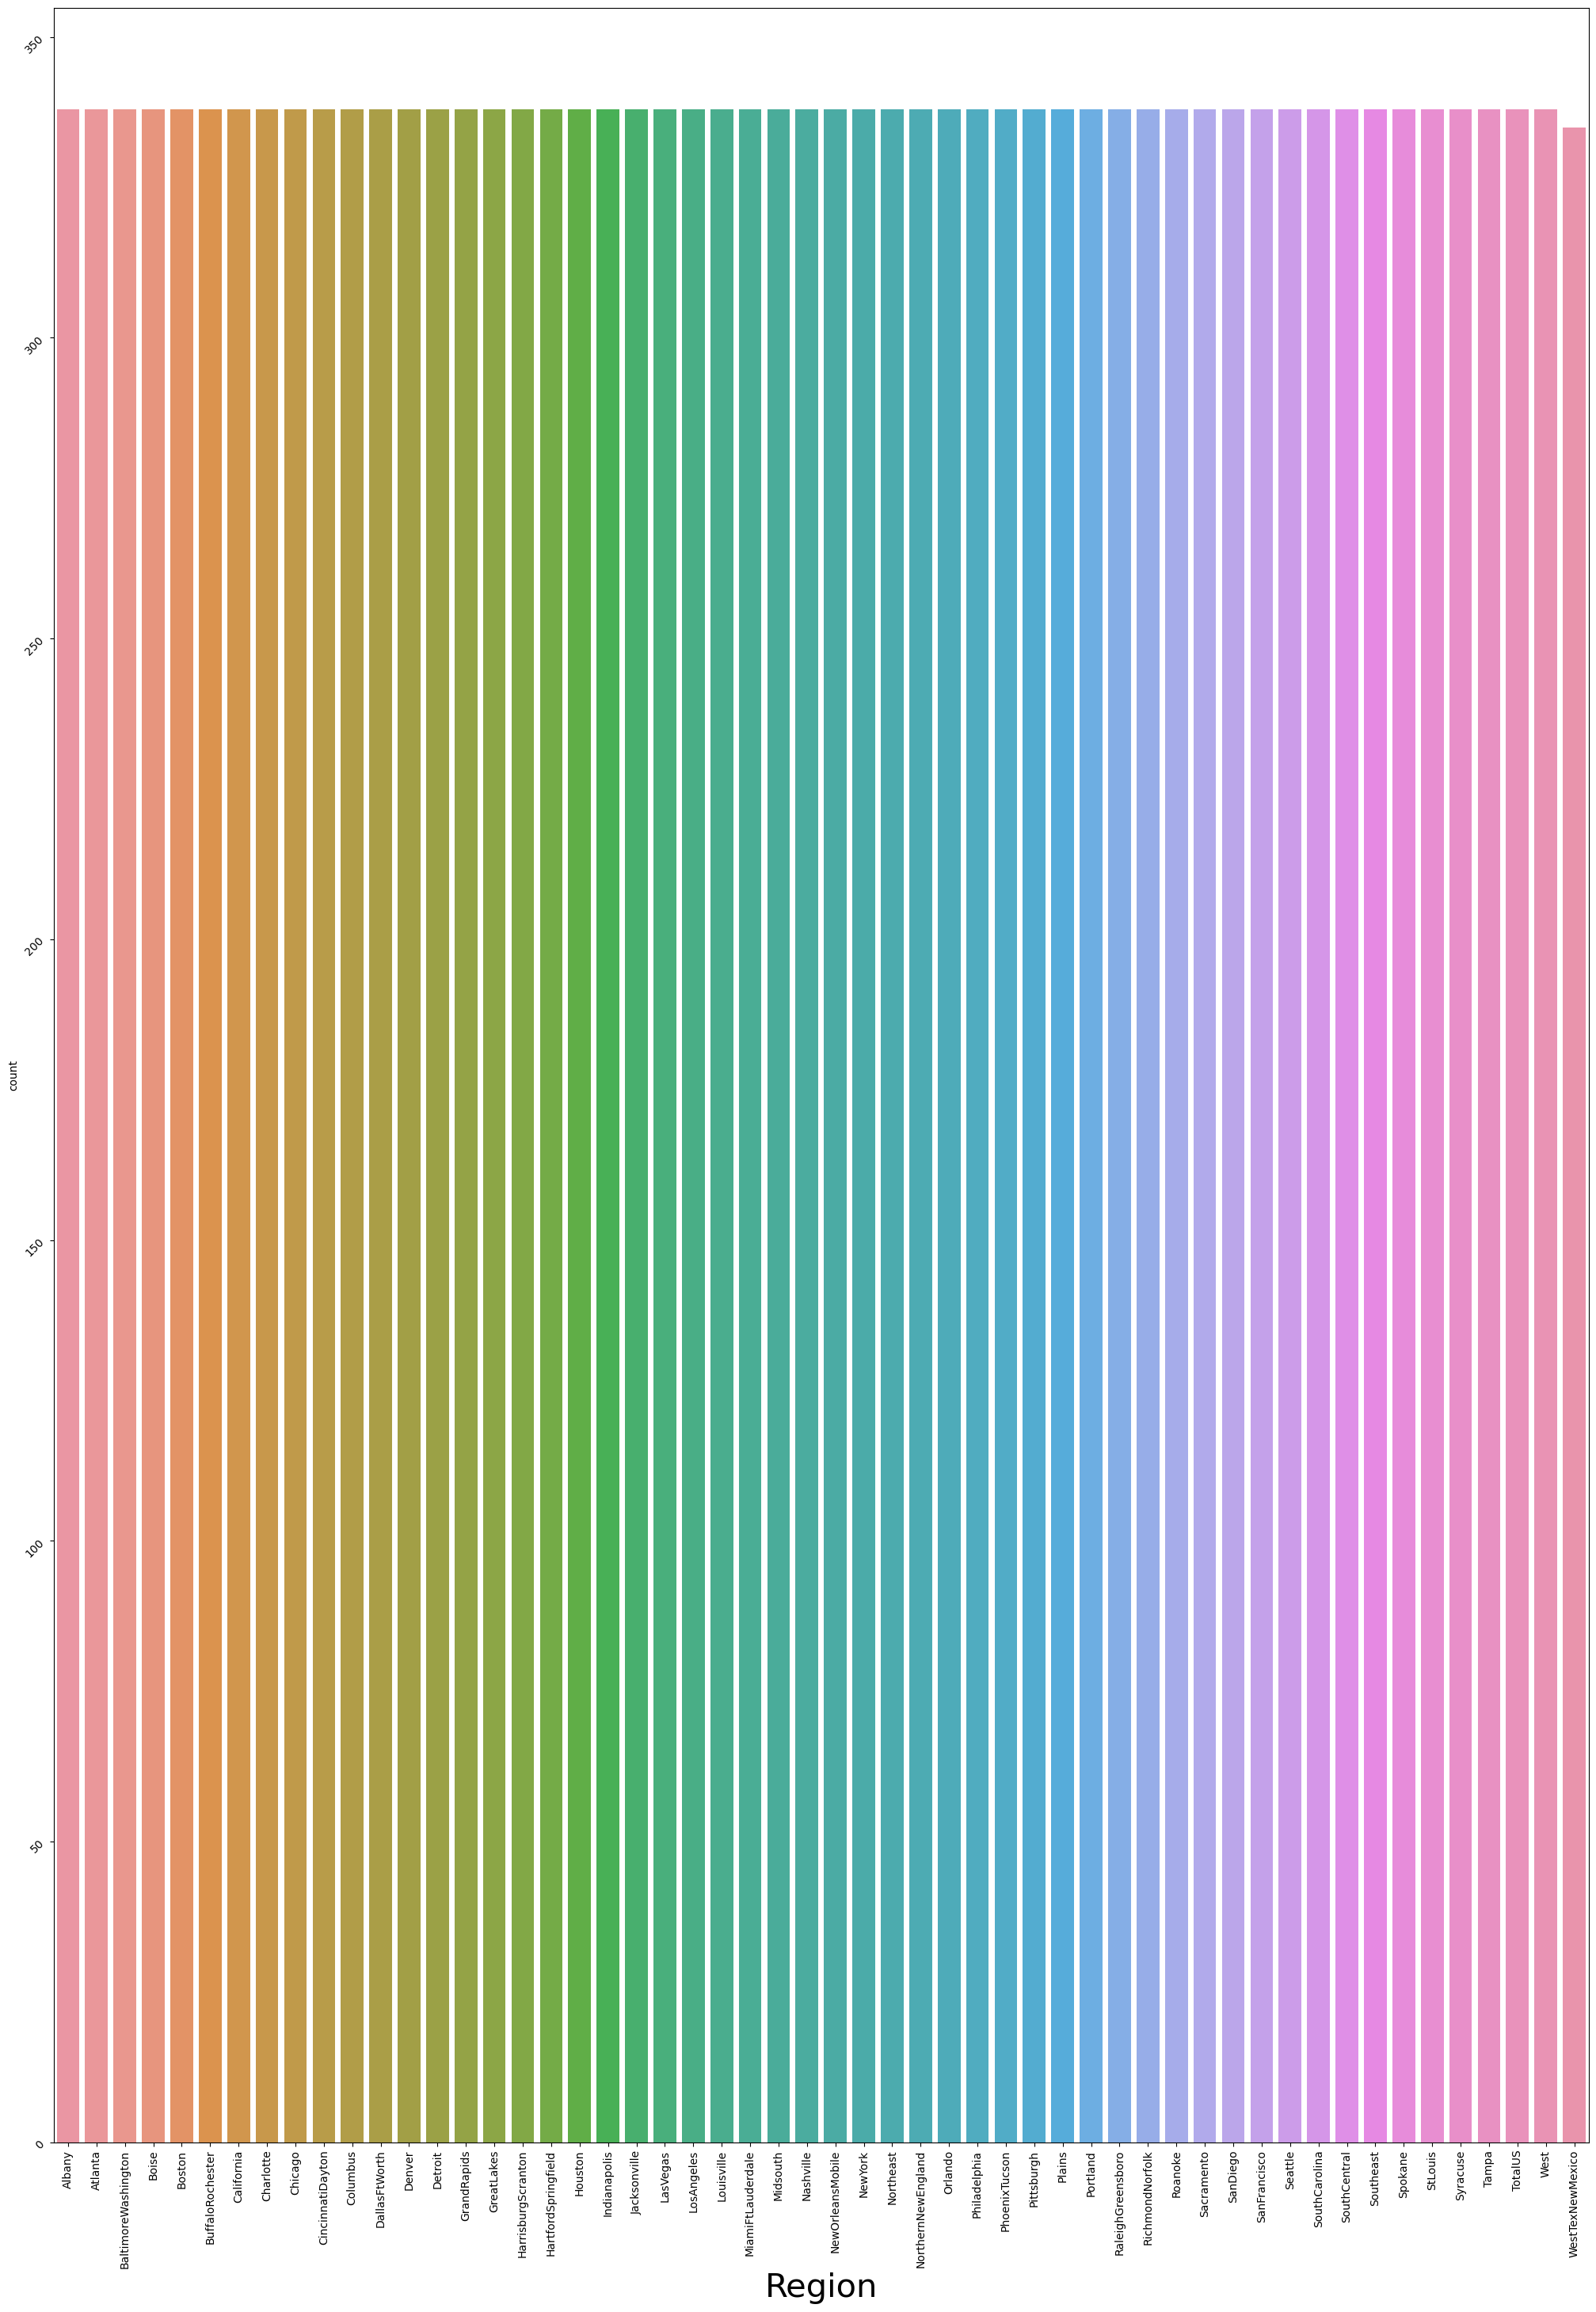

In [18]:
#Visualizing the count of ourTarget column region
print(df["region"].value_counts())

plt.figure(figsize=(25,35))
sns.countplot(x="region",data=df)
plt.yticks(rotation=45)
plt.xticks(rotation=90)
plt.xlabel("Region",fontsize=30)

**Observation:-**
    
Here you can see all the column values of region column aka also our Target column's value is same that is 338 except the WestTexNewMexico region who's value count is 335. 

Also there is a small classs imbalance issue in our target column dataset.

conventional    9126
organic         9123
Name: type, dtype: int64


Text(0.5, 0, 'Type')

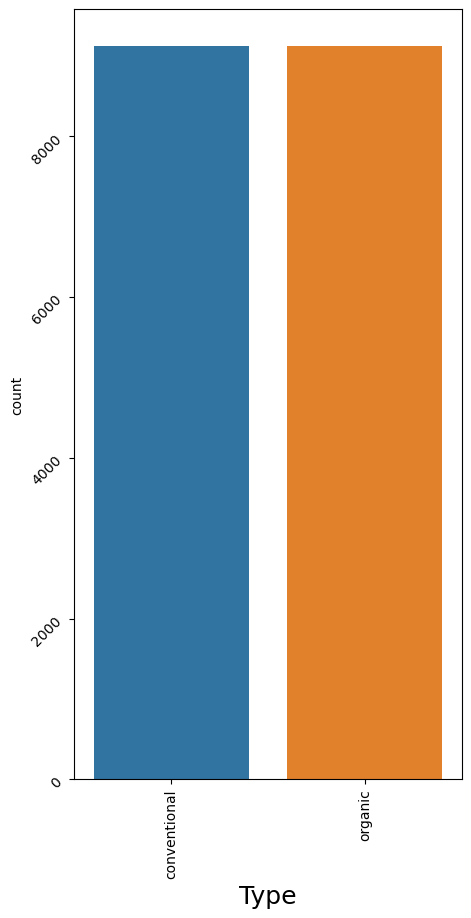

In [19]:
#Visualizing the count of type column
print(df["type"].value_counts())

plt.figure(figsize=(5,10))
sns.countplot(x="type",data=df)
plt.yticks(rotation=45)
plt.xticks(rotation=90)
plt.xlabel("Type",fontsize=18)

**Observation:-**

*Here you can see for Avocado type there are two types of Avocado that is conventional and organic and there value counts are 9126,9123.*

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


Text(0.5, 0, 'Year')

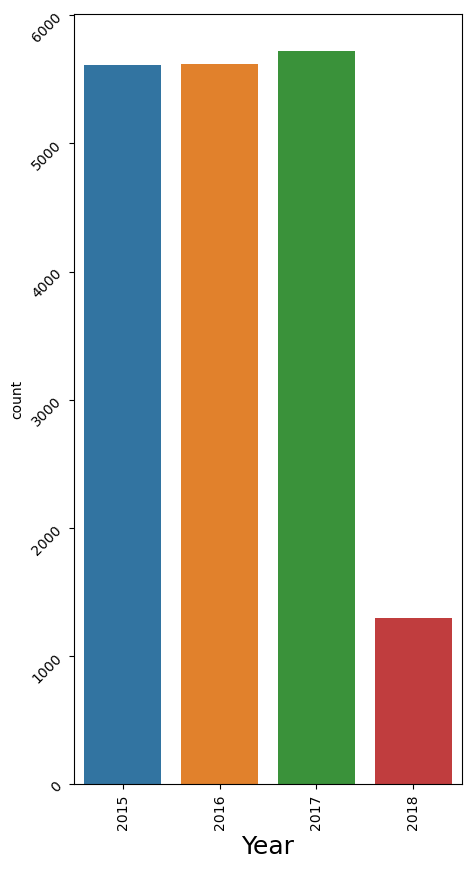

In [20]:
#Visualizing the count of year column
print(df["year"].value_counts())

plt.figure(figsize=(5,10))
sns.countplot(x="year",data=df)
plt.yticks(rotation=45)
plt.xticks(rotation=90)
plt.xlabel("Year",fontsize=18)

**Observation:-**

*Here you can see most of the ovservation is done in the year of 2017 and less observation is done in 2018.*

**Bi-variate analysis**

Text(0.5, 1.0, 'Relation between AveragePrice and Total Volume columns')

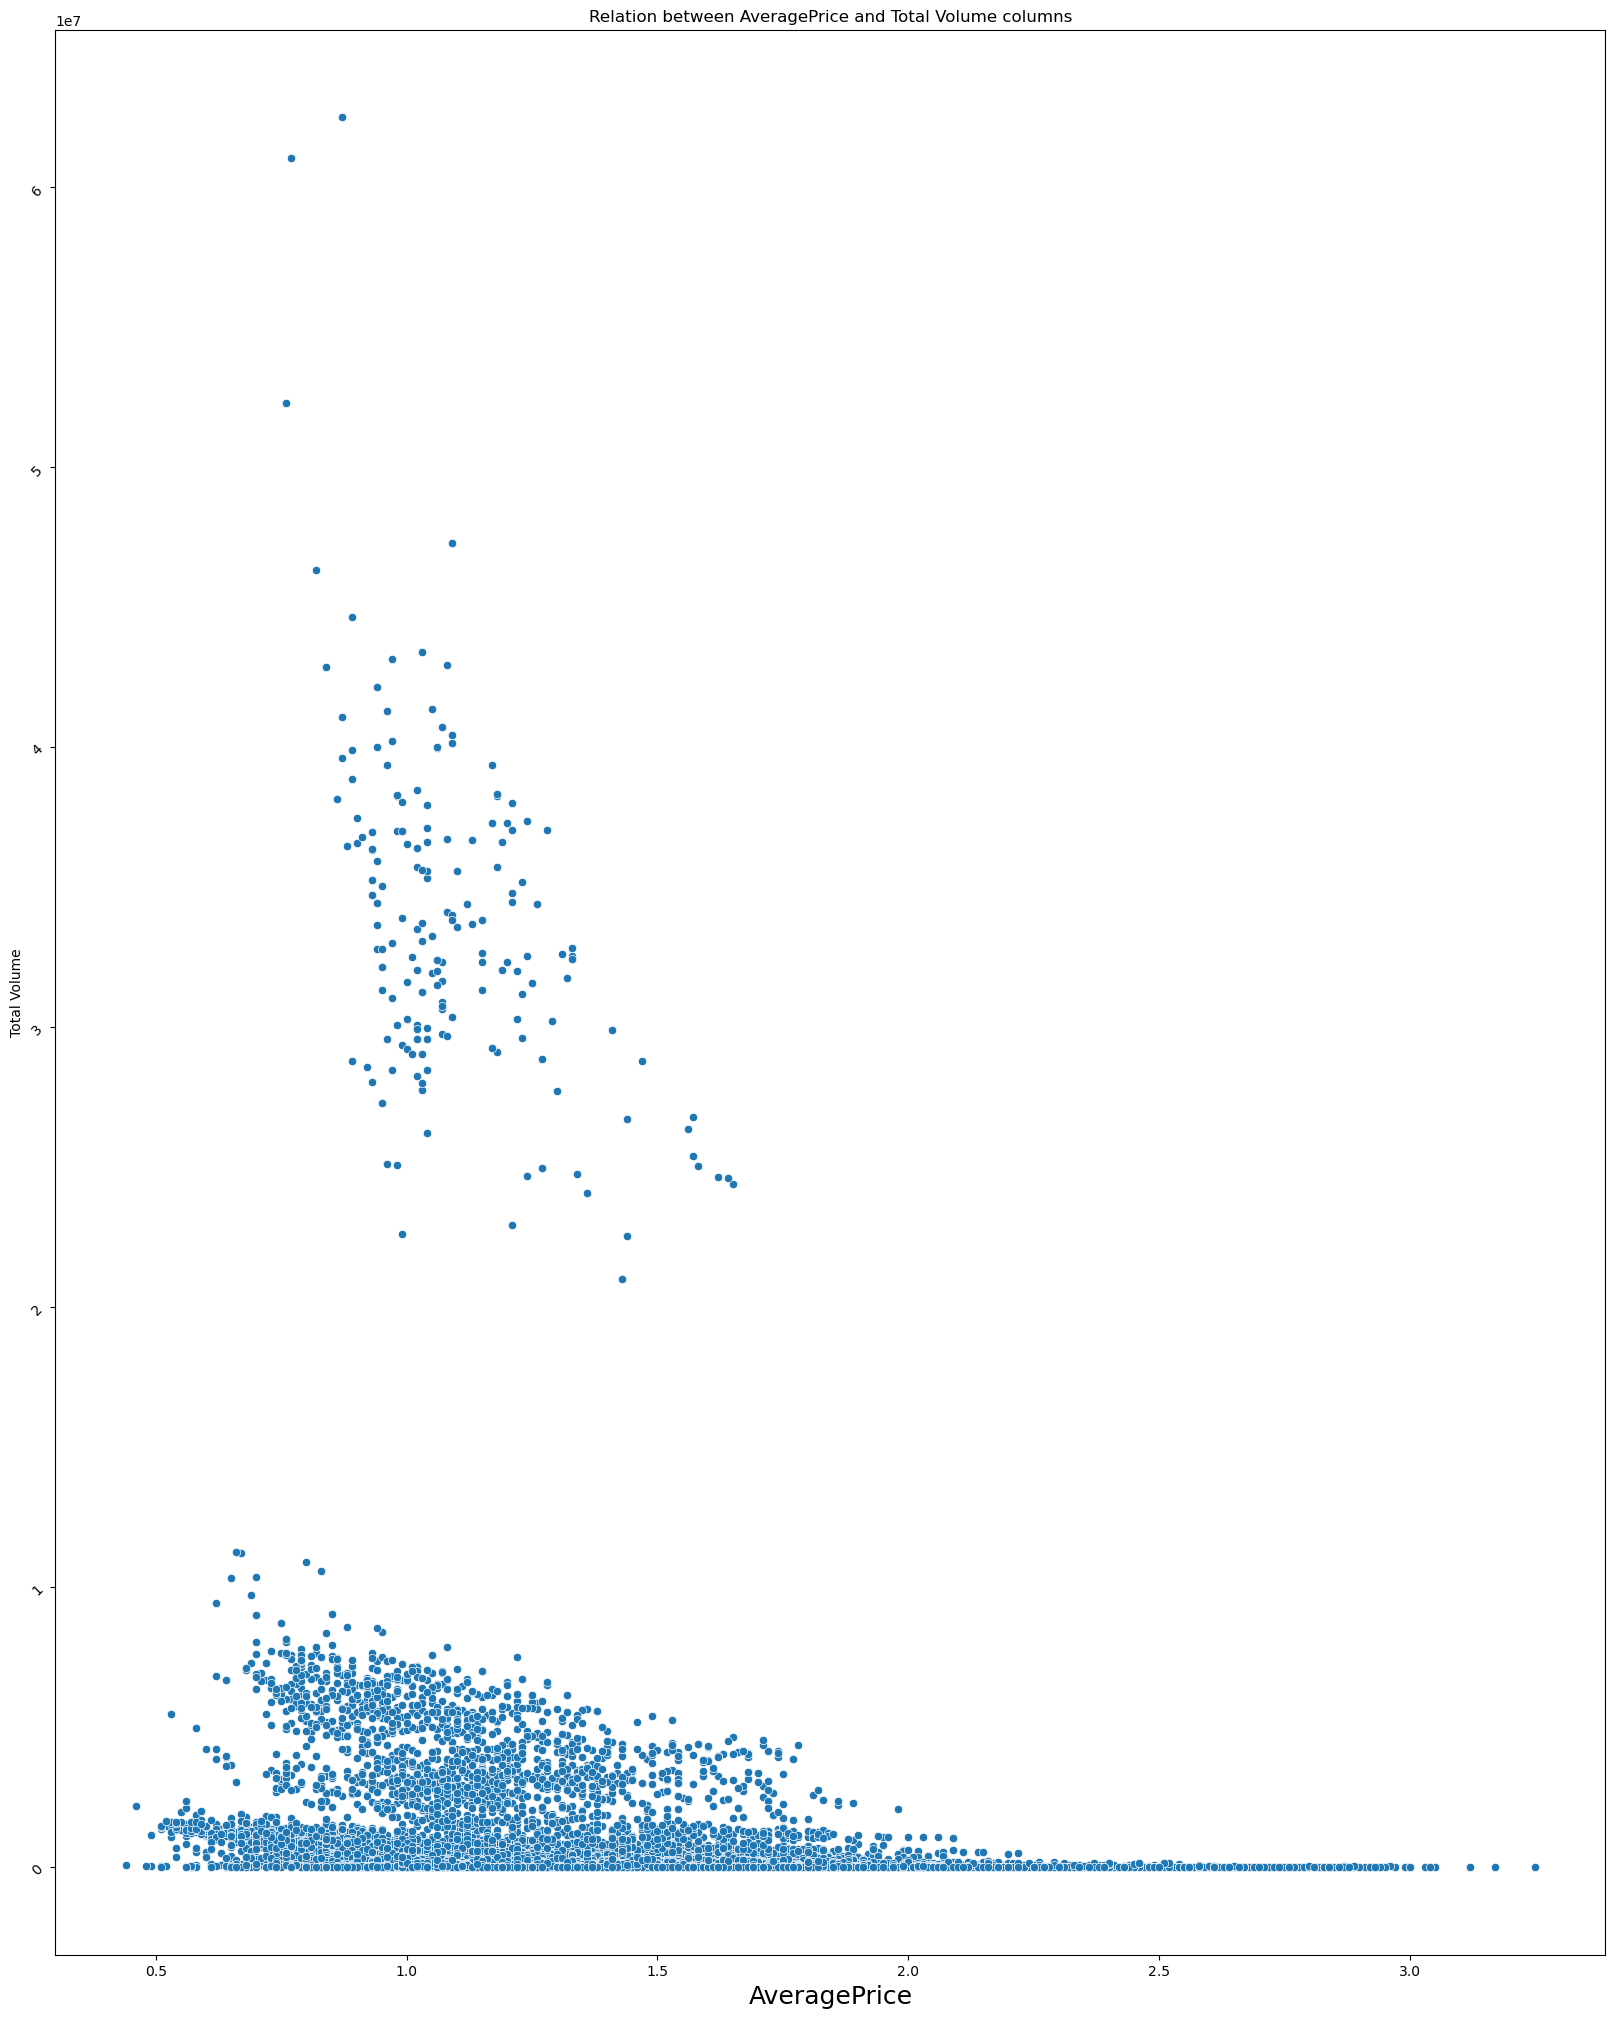

In [21]:
#Visualizing the relation between AveragePrice and Total Volume column in respect of our Target column region
plt.figure(figsize=(20,25))
sns.scatterplot(x="AveragePrice",y="Total Volume",data=df,palette="bright")
plt.yticks(rotation=45)
plt.xticks(rotation=0)
plt.xlabel("AveragePrice",fontsize=18)
plt.title("Relation between AveragePrice and Total Volume columns")

**Observation:-**

1) Here you can see when a single Avocado price is between 0.5  to 2.0 a very high volumn of avocado had been sold but when the price of a single Avocado is reached to above 2.0 there we can see a significant drop of sales volumn.

2) Means we can sale the Avocado in high volumns if average price of a single Avocado is 0.5 to 2.0.


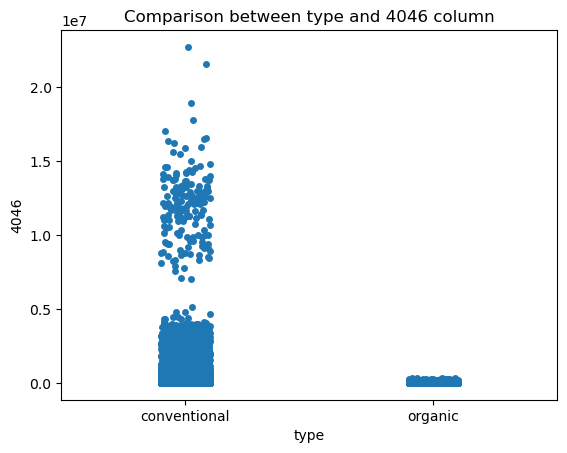

In [22]:
plt.title("Comparison between type and 4046 column") 
sns.stripplot(x="type", y="4046", data=df)
plt.show()

**Here you can see most of the avocado of PLU 4046 code is sold for convention type of avocado.And for PLU 4046 code there is too less avocado sold for organic type.**

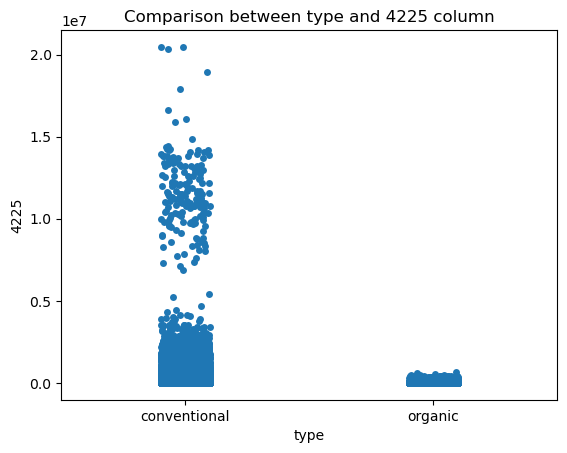

In [23]:
plt.title("Comparison between type and 4225 column") 
sns.stripplot(x="type", y="4225", data=df)
plt.show()

**For PLU 4225 code there is also too much avocado sold for conventional type and too less avocado sold for organic type.**

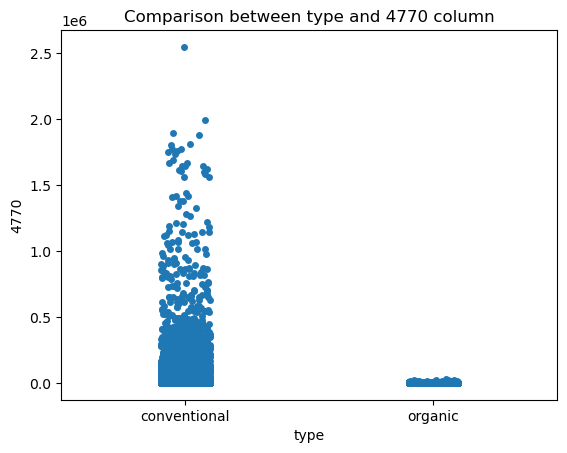

In [24]:
plt.title("Comparison between type and 4770 column") 
sns.stripplot(x="type", y="4770", data=df)
plt.show()

**For PLU 4225 code also there is too much avocado sold for conventional type and too less avocado sold for organic type.**

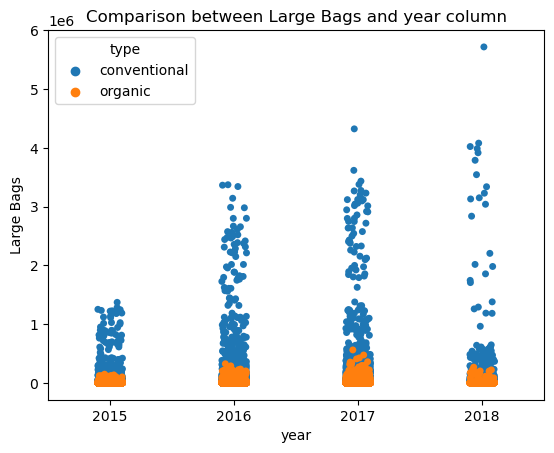

In [25]:
plt.title("Comparison between Large Bags and year column") 
sns.stripplot(x="year", y="Large Bags", data=df,hue="type")
plt.show()

**Here you can see from 2015 to 2017 there is huge increases in sales of Avocado while sold in Large bags and for 2018 you can see there is an certain decrease of sales of Large bags.** 

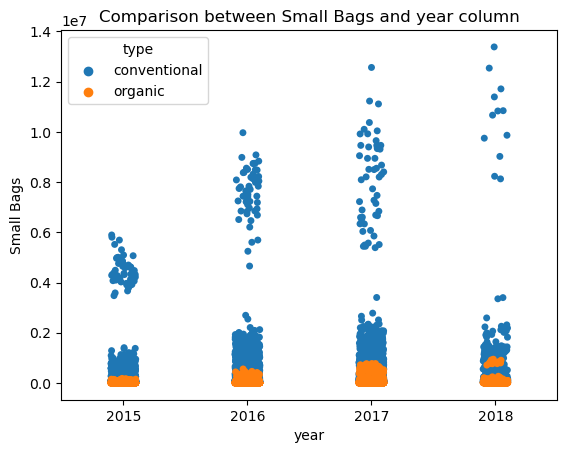

In [26]:
plt.title("Comparison between Small Bags and year column") 
sns.stripplot(x="year", y="Small Bags", data=df,hue="type")
plt.show()

**Here you can see for 2015 to 2017 there is increases in Small Bags sold of Avocado and in 2018 there is so decrement in Small Bags of Avocado sale.Also you can see in 2017 there is maximum sales of organic Avocado.** 

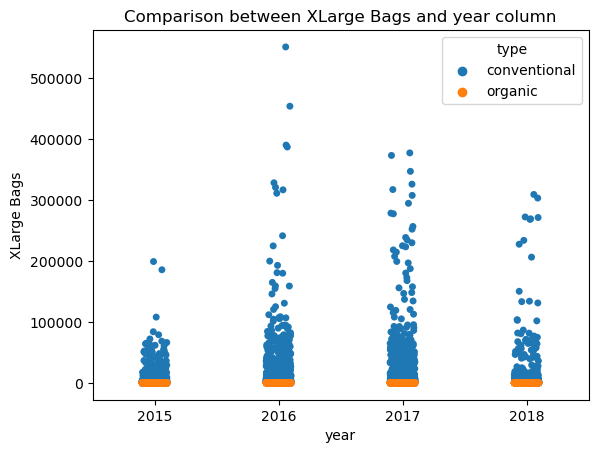

In [27]:
plt.title("Comparison between XLarge Bags and year column") 
sns.stripplot(x="year", y="XLarge Bags", data=df,hue="type")
plt.show()

**Here you can see from 2015 to 2016 there is an increase of XLarge Bags avocado sale and in 2017 there is littlebit decrement in sales of XLarge Bags avocado and for 2018 there is also some decrement in XLarge Bags of Avocado. And there is one more thing for all of the years the same ammount of Organic Avocado sold for XLarge Bags.**

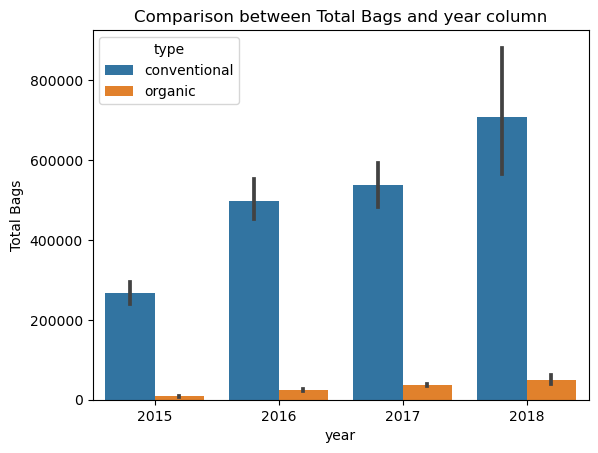

In [28]:
plt.title("Comparison between Total Bags and year column") 
sns.barplot(x="year", y="Total Bags", data=df,hue="type")
plt.show()

**For every years Total bags of avocado is increasing and sales of organic type of Avocado is also increasing year by year.**

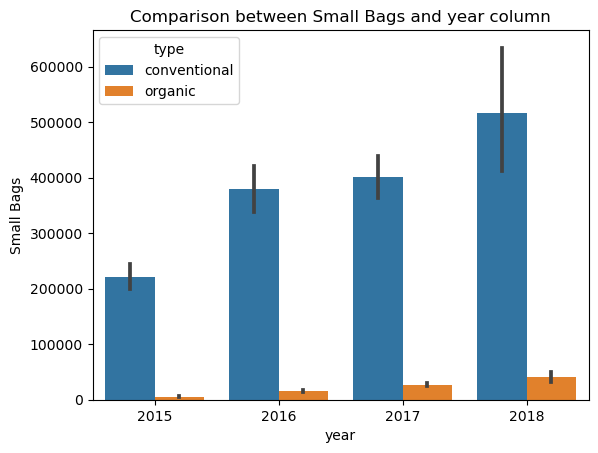

In [29]:
plt.title("Comparison between Small Bags and year column") 
sns.barplot(x="year", y="Small Bags", data=df,hue="type")
plt.show()

**Year by year Small bags of Avocado sales is increasing also in those bags organic type of Avocado count is also increasing.**

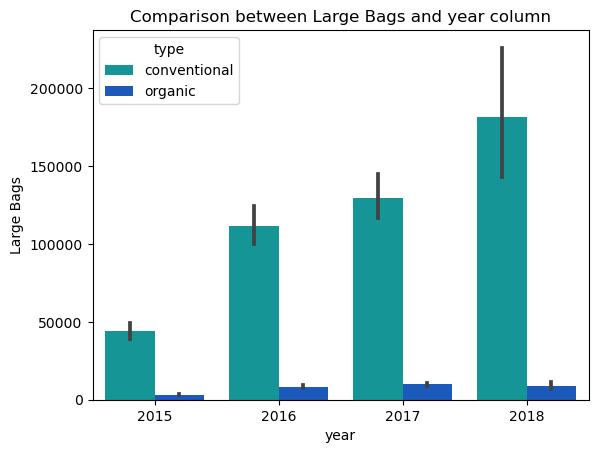

In [30]:
plt.title("Comparison between Large Bags and year column") 
sns.barplot(x="year", y="Large Bags", data=df,hue="type",palette="winter_r")
plt.show()

**Here also you can see year by year Large bags of Avocado sales are increasing but after 2016 there is no increment in the sales of organic type of Avocado in Large Bags.**

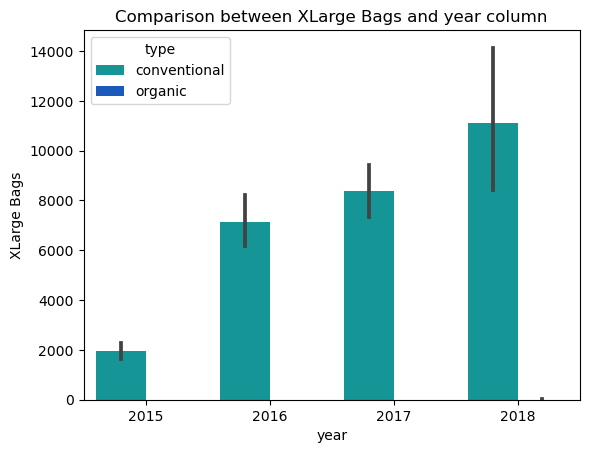

In [31]:
plt.title("Comparison between XLarge Bags and year column") 
sns.barplot(x="year", y="XLarge Bags", data=df,hue="type",palette="winter_r")
plt.show()

**Here you can see rapid increment in XLarge Bags of Avocado sales but in XLarge Bags there are organic types of Avocado sold.In XLarge Bags there are only conventional Avocado.**

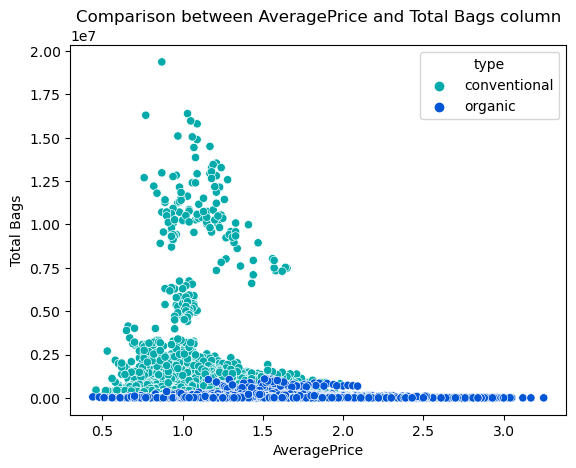

In [32]:
plt.title("Comparison between AveragePrice and Total Bags column") 
sns.scatterplot(x="AveragePrice", y="Total Bags", data=df,hue="type",palette="winter_r")
plt.show()

**Here you can see if the single avocado price is set between 0.5 to 1.5 then Total bags are increases means most sales are generated.If single avocado price is above 1.5 then there is extram decrement on Total bags sales means there is very less sales.**

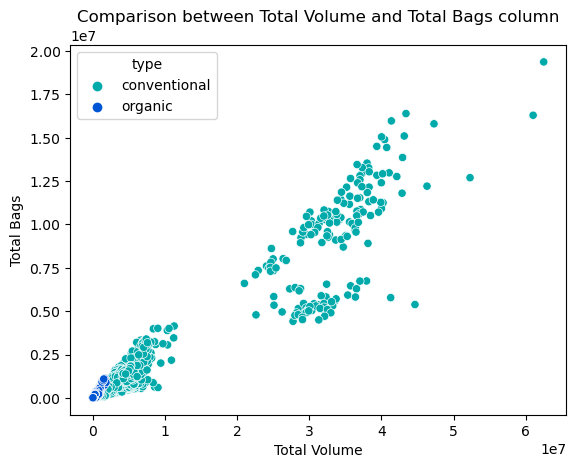

In [33]:
plt.title("Comparison between Total Volume and Total Bags column") 
sns.scatterplot(x="Total Volume", y="Total Bags", data=df,hue="type",palette="winter_r")
plt.show()

**Here you can see a positive correlation betweeen Total Volume and Total Bags becasue if total volumn of sales is increaseing the it's ovious Total bags are increases also.**

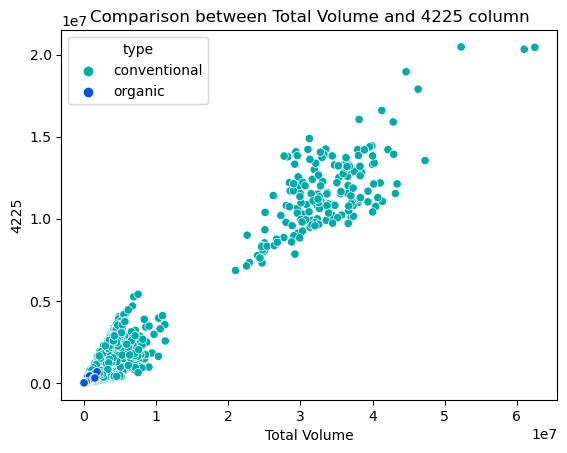

In [34]:
plt.title("Comparison between Total Volume and 4225 column") 
sns.scatterplot(x="Total Volume", y="4225", data=df,hue="type",palette="winter_r")
plt.show()

**Here you can see if 4225 PLU code type of Avocados sales are increasing then the volumn of sales also increasing.**

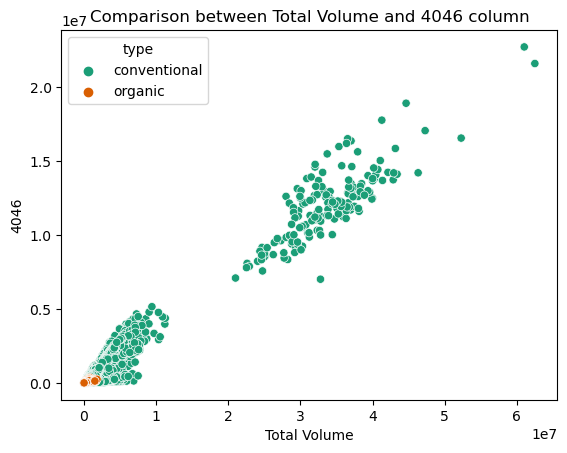

In [35]:
plt.title("Comparison between Total Volume and 4046 column") 
sns.scatterplot(x="Total Volume", y="4046", data=df,hue="type",palette="Dark2")
plt.show()

**You can see if 4046 PLU type of Avocado sales had increased then the volumn of sales also increased.Also you can see very less Organic type of Avocado has been sold.**

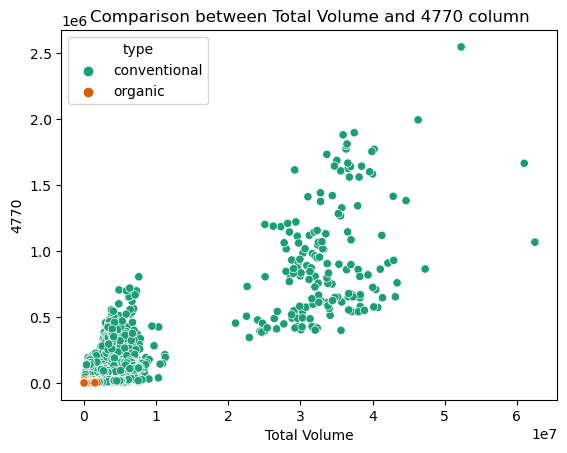

In [36]:
plt.title("Comparison between Total Volume and 4770 column") 
sns.scatterplot(x="Total Volume", y="4770", data=df,hue="type",palette="Dark2")
plt.show()

**Here you can see if 4770 PLU type of Avocado sales had increased then the volumn of sales also increased but the relation is not strongly correlated.**

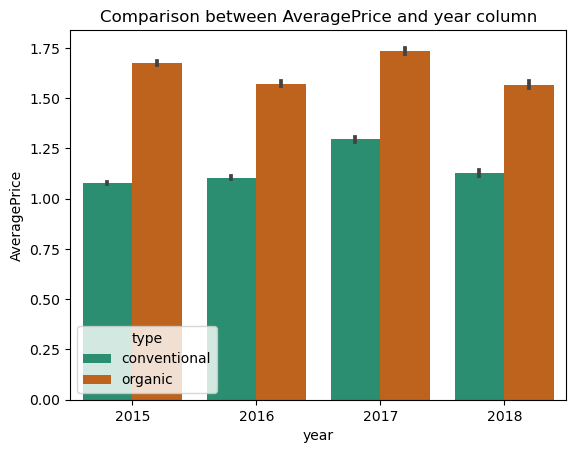

In [37]:
plt.title("Comparison between AveragePrice and year column") 
sns.barplot(x="year", y="AveragePrice", data=df,hue="type",palette="Dark2")
plt.show()

**Observation:-**
    
*1) Here you can see a year wise comparision for average price of Avocado type wise.*

*2) Organic types of Avocados has higher average price comparitively against Conventional type of Avocado.*

*3) In 2017 Organic Avocados average price was at it's peak.*

*4) in 2017 Conventional tyoe of Avocados average price was at it's peak.*

**Multi-Variate Analysis**

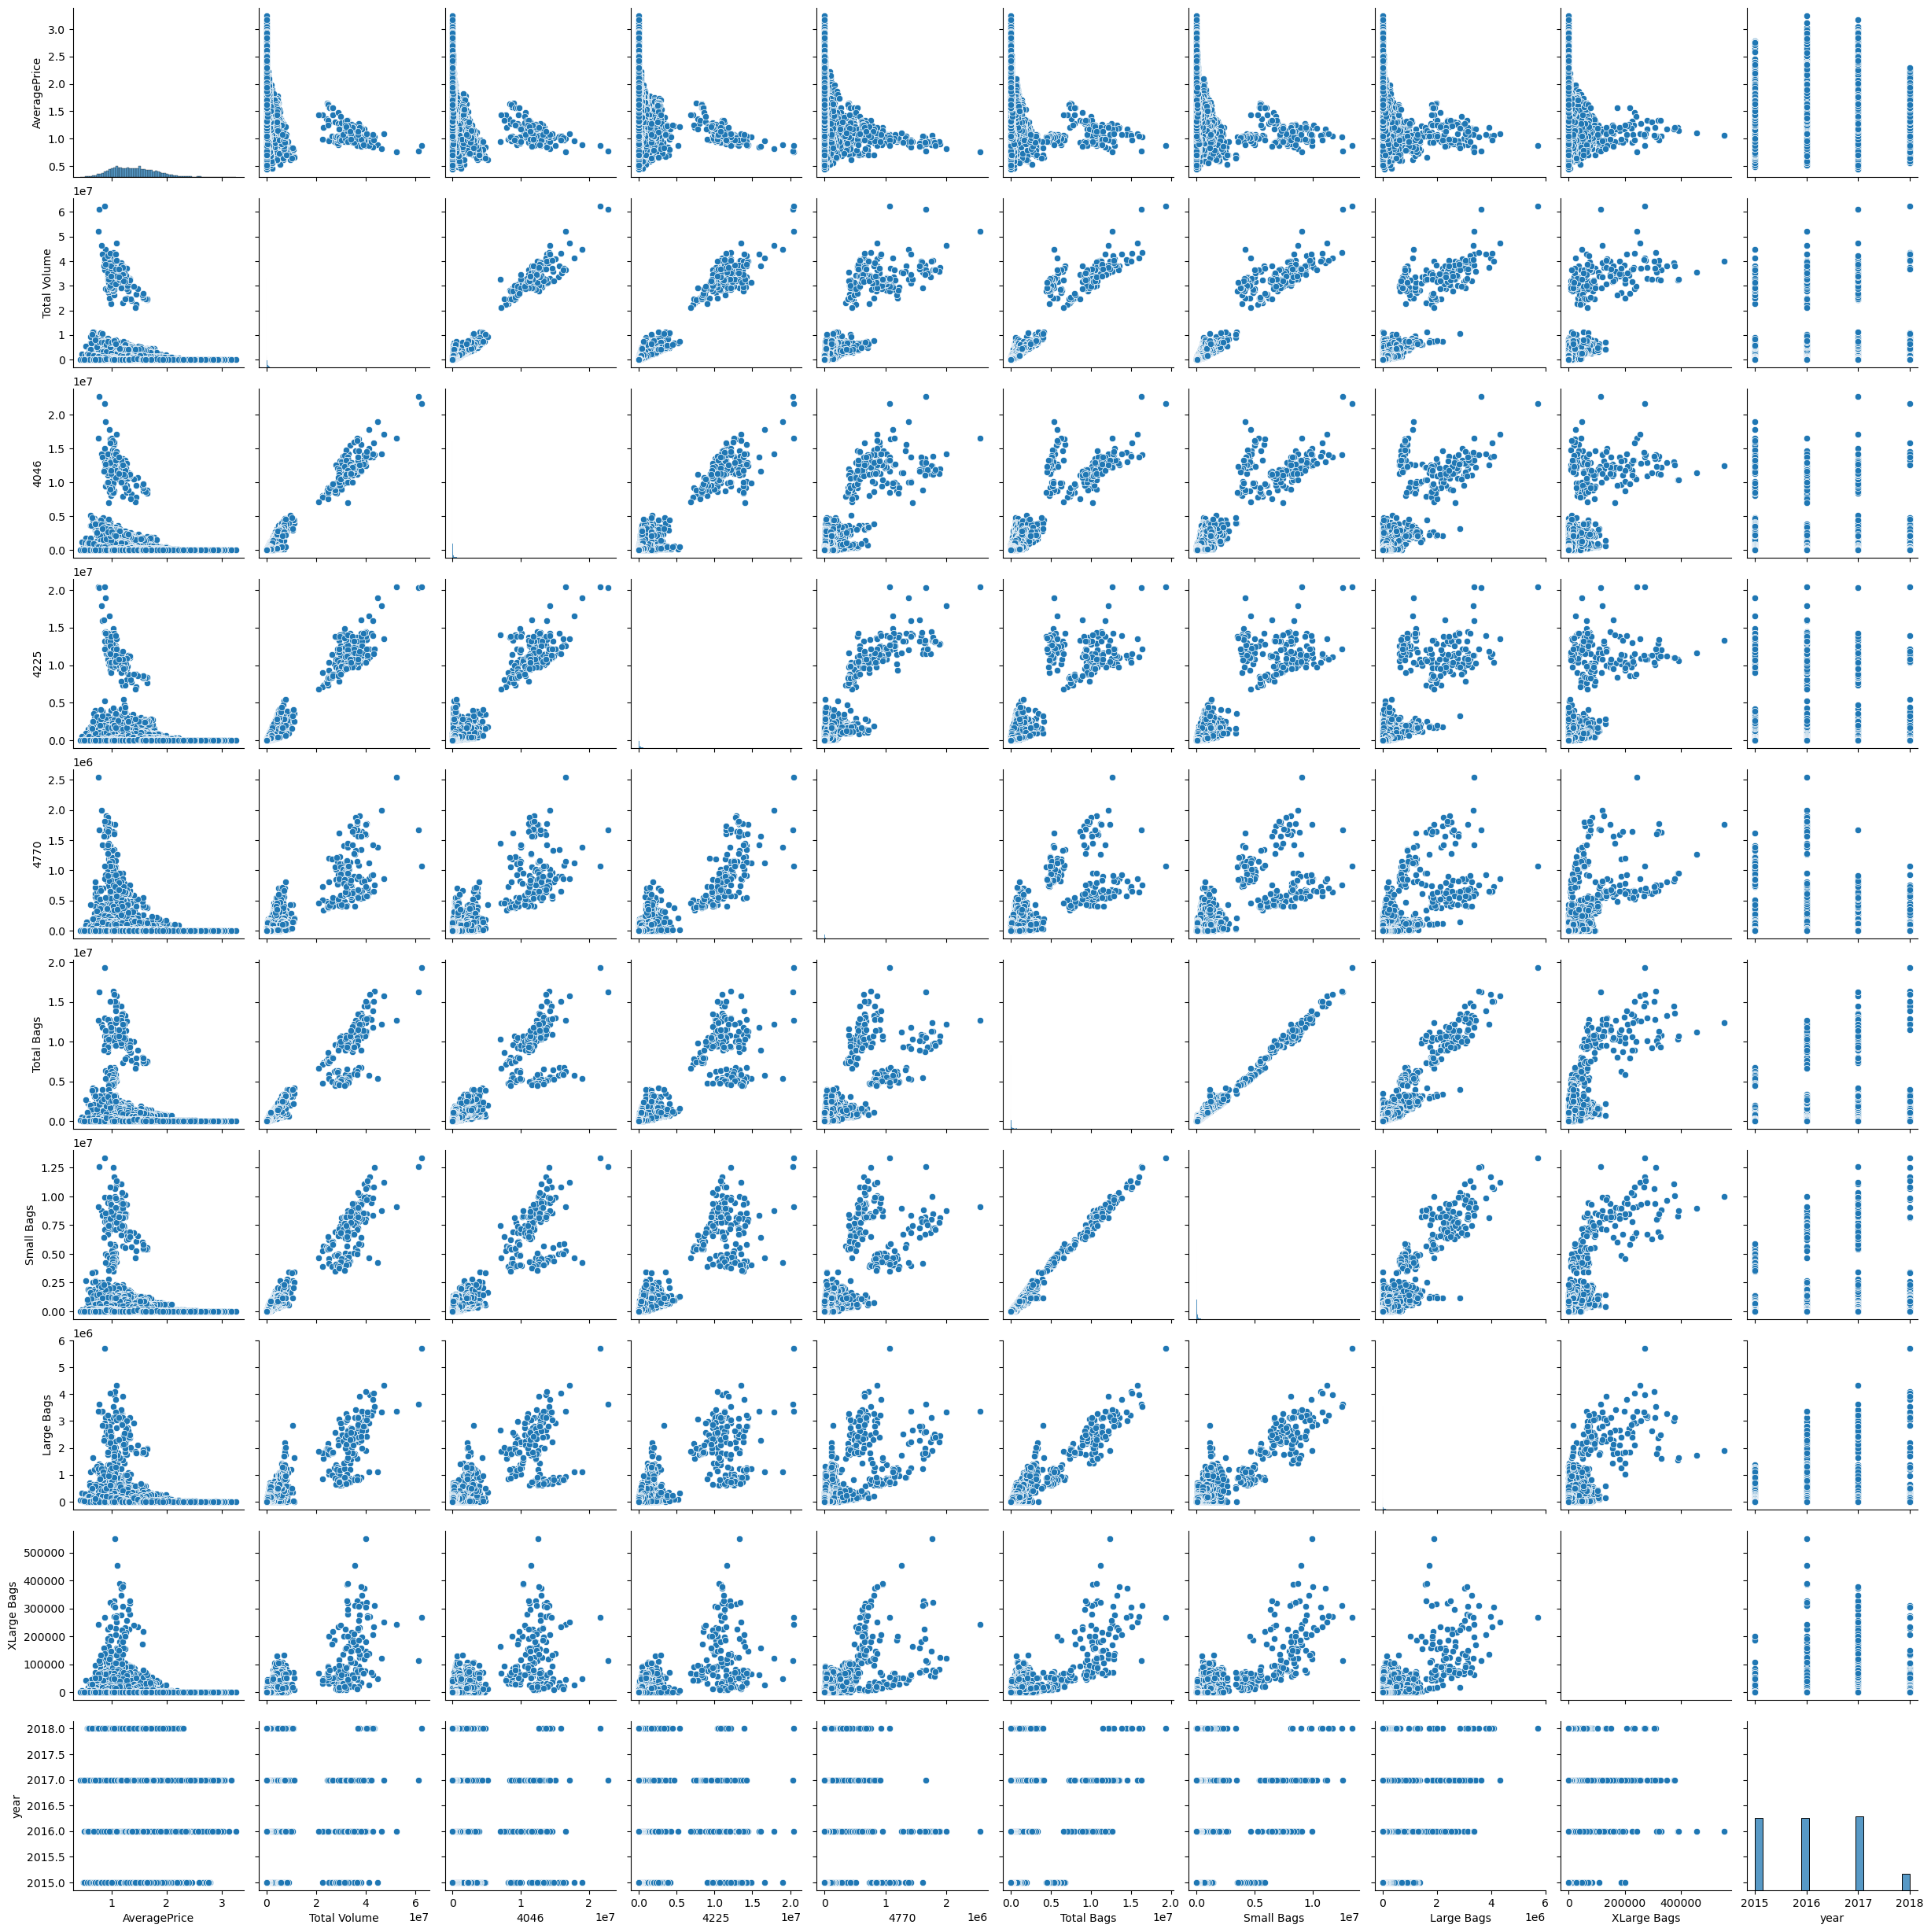

In [38]:
#Creating pair plot
sns.pairplot(df,palette="Dark2")
plt.show()

**Observation:-**

*1) Total Volume has a good linear correlation with the Total Bags ,Small Bags ,4046 and 4225.*

*2) Total Bags has good strong correlation with the Small Bags.*

*3) Can see Year by year growth for 

*4) Here some of the columns data you can't see because those are categorical data and pair plot can give you only those column those have numerical data.*


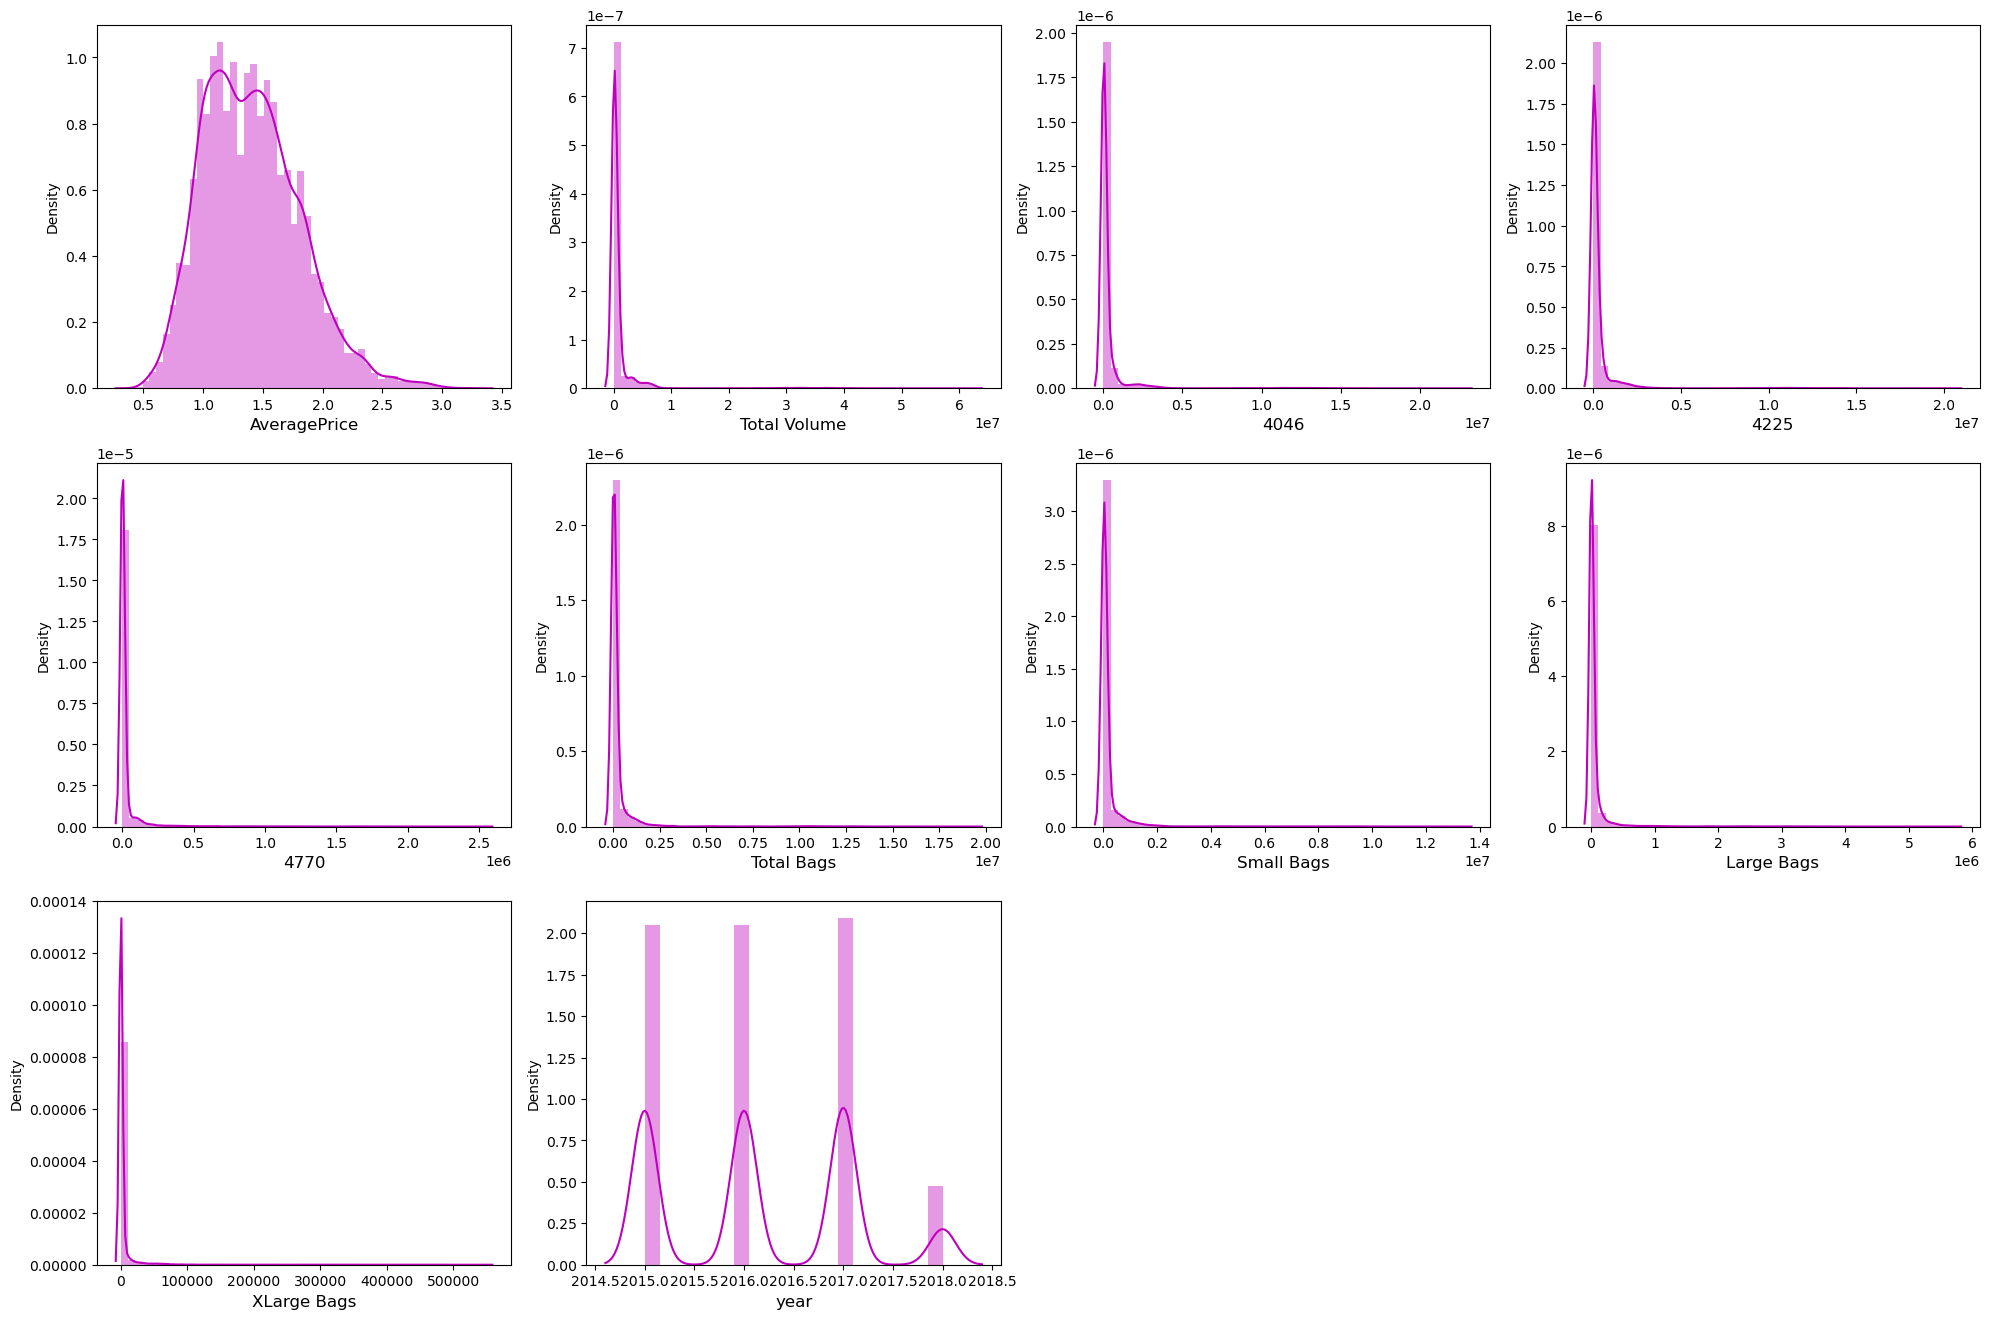

In [39]:
#Let's check how the data distributed to the numerical columns
plt.figure(figsize=(20,26),facecolor="white")
plot_number=1
for col in df.columns:
    if plot_number<=20:
        if df[col].dtypes=="object":
            continue
        plt.subplot(6,4,plot_number)
        sns.distplot(df[col],color="m")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plot_number+=1
plt.tight_layout()

**Observation:-**

*Here you can see only AveragePrice column's value distribution looks like little bit towards normal distribution otherwise all other columns has right tail skewness.*

# Checking for outliers

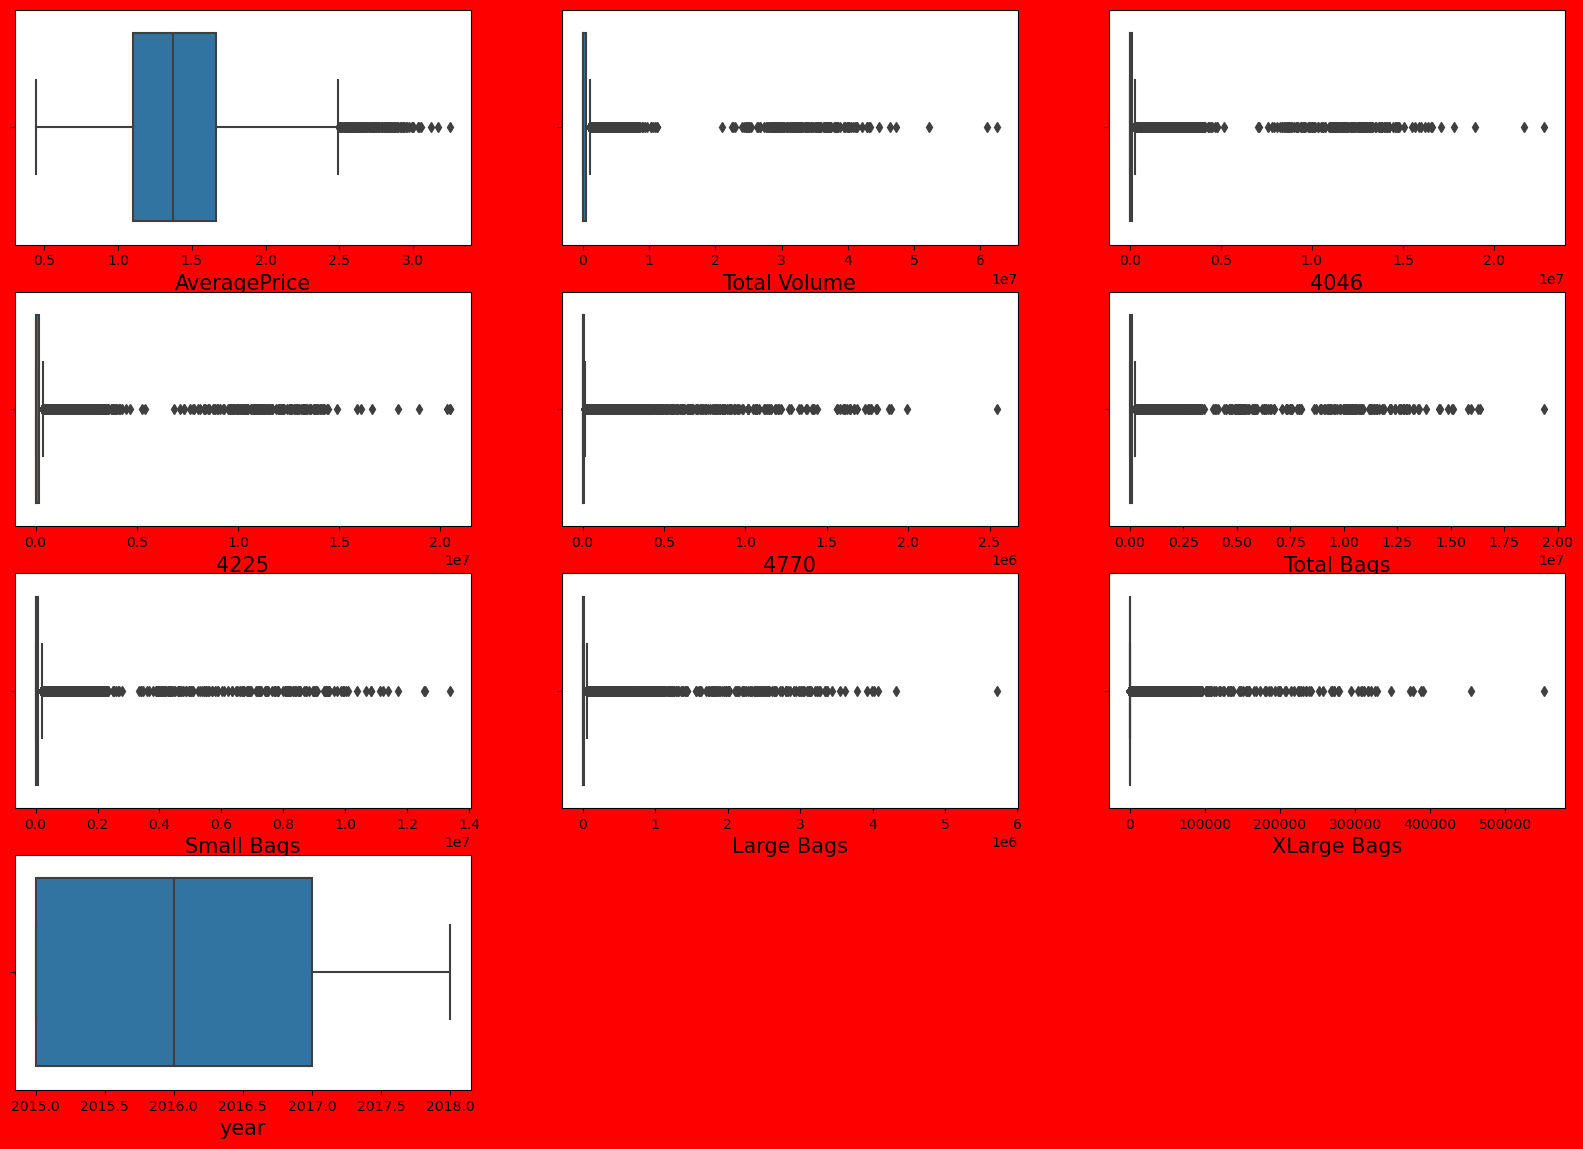

In [40]:
#Here I did not include the region column because it's our Target column and also I did not select the type column because that is categorical column 
numeric=df[["AveragePrice","Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags","year"]]

#Checking outliers using boxplot
plt.figure(figsize=(20,25),facecolor="r")
plot=1

for i in numeric:
    if plot<=21:
    

        plt.subplot(7,3,plot)
        sns.boxplot(x=numeric[i])
        plt.xlabel(i,fontsize=15)
    plot+=1
    

plt.show()

**Observation:-**
    
*1) Here you can see except year columns all columns have outliers.*

*2) For some column's boxplot you can't see the box and wishkers because those column's inside data are really close to each other.*

# Removing Outliers

**Using zscore**

In [41]:
#Inculding all columns those have outliers except our Target column to a variable named numeric.
#Here I did not include the region column because it's our Target column and also I did not select the type column because that is categorical column 
numeric=df[["AveragePrice","Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags","year"]]
from scipy.stats import zscore
z=np.abs(zscore(numeric))
z

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          0.188689      0.227716  0.230816  0.199902  0.212091    0.234170   
1          0.139020      0.230427  0.231103  0.208054  0.211997    0.233350   
2          1.182069      0.212085  0.231007  0.154478  0.211325    0.234730   
3          0.809551      0.223444  0.230741  0.185350  0.211864    0.237096   
4          0.312861      0.231538  0.230891  0.208719  0.211834    0.236718   
...             ...           ...       ...       ...       ...         ...   
18244      0.556347      0.241373  0.230017  0.243857  0.212540    0.229301   
18245      0.755023      0.242296  0.230693  0.242277  0.212540    0.233594   
18246      1.152375      0.242331  0.230693  0.243090  0.205766    0.233463   
18247      1.301382      0.241625  0.230428  0.242651  0.205774    0.231866   
18248      0.531512      0.241253  0.229347  0.243170  0.210450    0.230807   

       Small Bags  Large Bags  XLarge Bags      year  
0        0.232647    0.222352      0.17558  1.221282  
1        0.231568    0.222335      0.17558  1.221282  
2        0.233399    0.222311      0.17558  1.221282  
3        0.236568    0.222186      0.17558  1.221282  
4        0.236154    0.221924      0.17558  1.221282  
...           ...         ...          ...       ...  
18244    0.226665    0.220964      0.17558  1.970504  
18245    0.232196    0.221403      0.17558  1.970504  
18246    0.231644    0.222561      0.17558  1.970504  
18247    0.229543    0.222529      0.17558  1.970504  
18248    0.228111    0.222628      0.17558  1.970504  

[18249 rows x 10 columns]

In [42]:
#Locating outliers location
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

In [43]:
#Finding outliers location by giving their row and column location
z.iloc[346,2]

3.199410614794124

**Here you can see by giving the outliers location I got the z score value that is above 3 that means it's an outlier.**

# Creating outliers free dataset

In [44]:
new_df=df[(z<3).all(axis=1)]
new_df.shape

(17651, 12)

In [45]:
print("Old DataFrame",df.shape[0])
print("New DataFrame",new_df.shape[0])

Old DataFrame 18249
New DataFrame 17651


**Here you can see 598 rows are deleted because those rows have outliers.**

In [46]:
#Calculating Data lost percentage after using zscore and  removeing outliers
print("Data lost parcentage:-",((df.shape[0]-new_df.shape[0])/df.shape[0])*100)

Data lost parcentage:- 3.276891884486821


**Observation:-** 
    
1) Here you can see I lost 3% of my data as outliers and we can afford this much data lost because it's below 10%.

2) I will try IQR method also to remove outliers although I know that the data lost percentage will comparitively higher than the zscore method from my previous experiances but still I willl try it.

**Remove outliers using IQR method**

In [47]:
#Q3
Q3=numeric.quantile(.75)

In [48]:
#Q1
Q1=numeric.quantile(.25)

In [49]:
#IQR
IQR=Q3-Q1
new_df1=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]

In [50]:
print("Old DataFrame",df.shape[0])
print("New DataFrame",new_df1.shape[0])

Old DataFrame 18249
New DataFrame 11538


**Here you can see using IQR method 6711 rows get lost.Lets check the data lost percentage.**

In [51]:
print("Data lost parcentage:-",((df.shape[0]-new_df1.shape[0])/df.shape[0])*100)

Data lost parcentage:- 36.774617787276014


**Observation:-**
    
Here you can see 36% of our data will get lost if I chose the IQR method and I can't afford that much data lost.So I will use new_df as my outlier free dataset where zscore method get used.

# Checking data distribution for each numeric column again

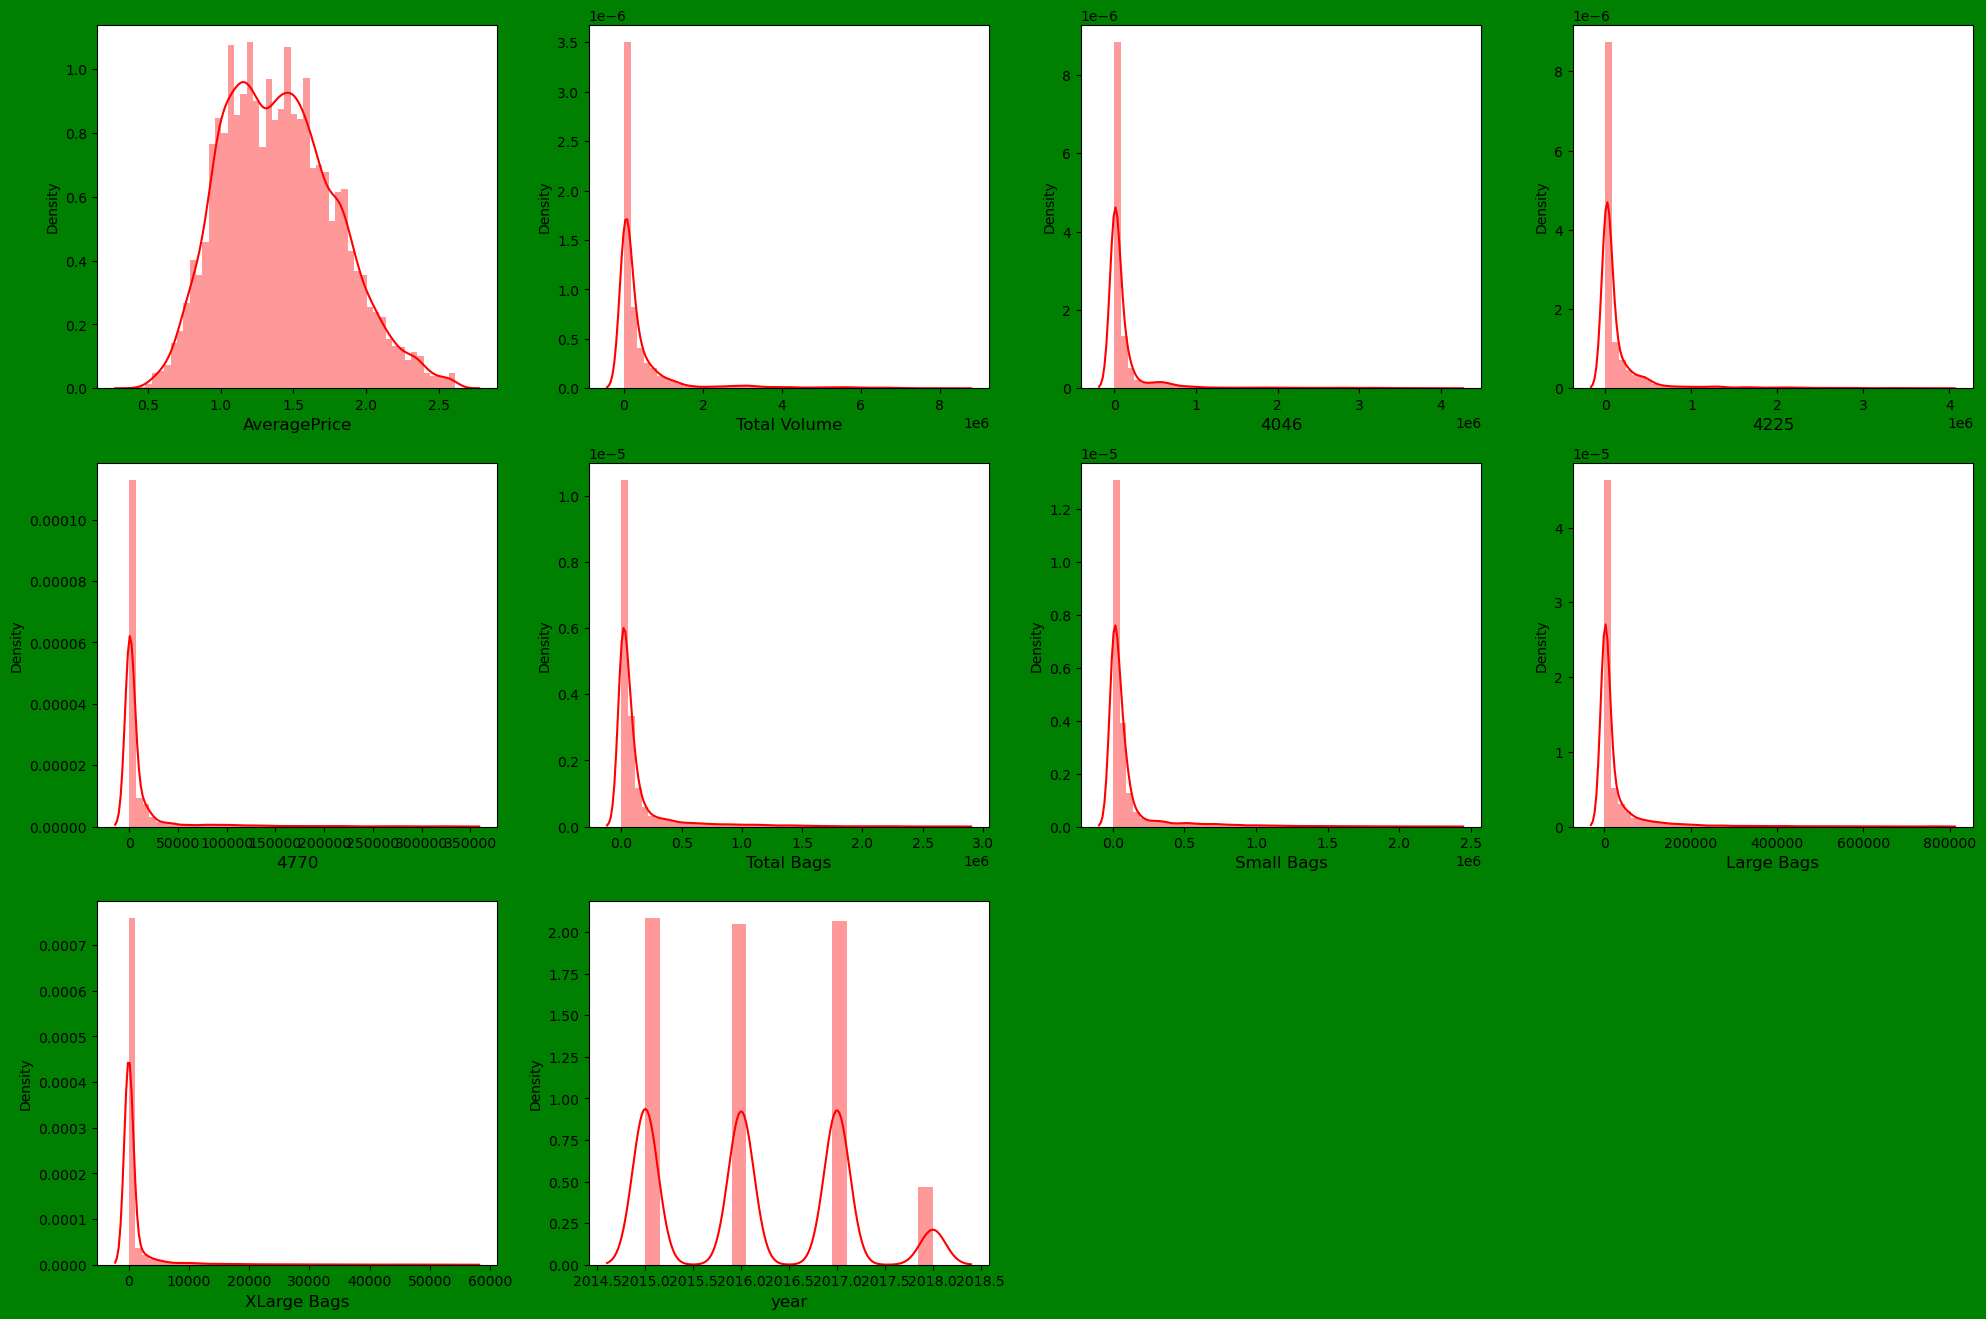

In [52]:
#Let's check how the data distributed to the numerical columns
plt.figure(figsize=(20,26),facecolor="g")
plot_number=1
for col in new_df.columns:
    if plot_number<=20:
        if new_df[col].dtypes=="object":
            continue
        plt.subplot(6,4,plot_number)
        sns.distplot(new_df[col],color="r")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plot_number+=1
plt.tight_layout()

**Looks almost same like our old dataset's data distribution.So lets it's skewness.**

# Checking Skewness

In [53]:
new_df.skew().to_frame("Skewness value")

Skewness value
AveragePrice        0.377432
Total Volume        3.767138
4046                4.909848
4225                4.455745
4770                5.117170
Total Bags          4.066771
Small Bags          4.222706
Large Bags          5.053434
XLarge Bags         6.135607
year                0.229976

**Observation:-**

1) Our acceptable range for skewness value is +0.5 to -0.5 and here except year and AveragePrice columns all columns are above that range so we have to reduce these columns skewness.
2) Here 2 column region and type columns are missing becasue those are categorical columns and we don't have to chaeck their skewness because of that.

# Removing skewness

In [54]:
#Trying to reduce skewness using cube root method
a=new_df["Total Volume"]
b=new_df["4046"]
c=new_df["4225"]
d=new_df["4770"]
e=new_df["Total Bags"]
f=new_df["Small Bags"]
g=new_df["Large Bags"]
h=new_df["XLarge Bags"]


a=np.cbrt(a)
b=np.cbrt(b)
c=np.cbrt(c)
d=np.cbrt(d)
e=np.cbrt(e)
f=np.cbrt(f)
g=np.cbrt(g)
h=np.cbrt(h)


print("Total Volume skewness:",a.skew())
print("4046 skewness:",b.skew())
print("4225 skewness:",c.skew())
print("4770 skewness:",d.skew())
print("Total Bags skewness:",e.skew())
print("Small Bags skewness:",f.skew())
print("Large Bags skewness:",g.skew())
print("XLarge Bags skewness:",h.skew())


Total Volume skewness: 1.2404352376568888
4046 skewness: 1.5558762160537236
4225 skewness: 1.2770247258698961
4770 skewness: 1.6356135523406201
Total Bags skewness: 1.2318314639479462
Small Bags skewness: 1.2460326927143561
Large Bags skewness: 1.2762133508923983
XLarge Bags skewness: 2.277027509941541


**Here you can see by using cbrt method we can not reduced any column's skewness according to our ecceptable range.Let's try another method:**

In [55]:
#Trying to reduce skewness using sqrt root method
a=new_df["Total Volume"]
b=new_df["4046"]
c=new_df["4225"]
d=new_df["4770"]
e=new_df["Total Bags"]
f=new_df["Small Bags"]
g=new_df["Large Bags"]
h=new_df["XLarge Bags"]


a=np.sqrt(a)
b=np.sqrt(b)
c=np.sqrt(c)
d=np.sqrt(d)
e=np.sqrt(e)
f=np.sqrt(f)
g=np.sqrt(g)
h=np.sqrt(h)


print("Total Volume skewness:",a.skew())
print("4046 skewness:",b.skew())
print("4225 skewness:",c.skew())
print("4770 skewness:",d.skew())
print("Total Bags skewness:",e.skew())
print("Small Bags skewness:",f.skew())
print("Large Bags skewness:",g.skew())
print("XLarge Bags skewness:",h.skew())


Total Volume skewness: 1.963864239750663
4046 skewness: 2.4975043264848007
4225 skewness: 2.1285045840666115
4770 skewness: 2.636657566074788
Total Bags skewness: 2.010691337585347
Small Bags skewness: 2.0937524665389438
Large Bags skewness: 2.2367564369618895
XLarge Bags skewness: 3.3124842464294337


**Here you can see sqrt also did not worked.**

In [56]:
#Trying to reduce skewness using log method
a=new_df["Total Volume"]
b=new_df["4046"]
c=new_df["4225"]
d=new_df["4770"]
e=new_df["Total Bags"]
f=new_df["Small Bags"]
g=new_df["Large Bags"]
h=new_df["XLarge Bags"]


a=np.log(a)
b=np.log(b)
c=np.log(c)
d=np.log(d)
e=np.log(e)
f=np.log(f)
g=np.log(g)
h=np.log(h)


print("Total Volume skewness:",a.skew())
print("4046 skewness:",b.skew())
print("4225 skewness:",c.skew())
print("4770 skewness:",d.skew())
print("Total Bags skewness:",e.skew())
print("Small Bags skewness:",f.skew())
print("Large Bags skewness:",g.skew())
print("XLarge Bags skewness:",h.skew())


Total Volume skewness: -0.05009236689694154
4046 skewness: nan
4225 skewness: nan
4770 skewness: nan
Total Bags skewness: nan
Small Bags skewness: nan
Large Bags skewness: nan
XLarge Bags skewness: nan


**Here you can see just one column that is Total Volume's skewness is reduced by using log method So I am going to implement this log method on Total Volume column permanently.**

In [57]:
#Using log method permanently on Total Volume column to reduced it's skewness
new_df["Total Volume"]=np.log(new_df["Total Volume"])

In [58]:
#Checking the skewness again
new_df.skew()

AveragePrice    0.377432
Total Volume   -0.050092
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
year            0.229976
dtype: float64

**Here you can see Total Volume skewness value is now in our acceptable range.So I am going to apply all the other transformation method on rest of the columns.Let's see:**

In [59]:
#Trying to reduce skewness using log+1p method
b=new_df["4046"]
c=new_df["4225"]
d=new_df["4770"]
e=new_df["Total Bags"]
f=new_df["Small Bags"]
g=new_df["Large Bags"]
h=new_df["XLarge Bags"]



b=np.log1p(b)
c=np.log1p(c)
d=np.log1p(d)
e=np.log1p(e)
f=np.log1p(f)
g=np.log1p(g)
h=np.log1p(h)


print("4046 skewness:",b.skew())
print("4225 skewness:",c.skew())
print("4770 skewness:",d.skew())
print("Total Bags skewness:",e.skew())
print("Small Bags skewness:",f.skew())
print("Large Bags skewness:",g.skew())
print("XLarge Bags skewness:",h.skew())


4046 skewness: -0.42027335362647233
4225 skewness: -0.6046194551303906
4770 skewness: 0.06853170194303994
Total Bags skewness: -0.3844927921821734
Small Bags skewness: -0.7889879508192367
Large Bags skewness: -0.6108741643177408
XLarge Bags skewness: 1.2162376397206656


**Here you can see log1p method can reduced the skewness of 4046,4770,Total Bags columns,So I am going to implement log1p method permanently on these columns to reduce their skewness.**

In [60]:
#Applying log1p to the selected columns permanently
new_df["4046"]=np.log1p(new_df["4046"])
new_df["4770"]=np.log1p(new_df["4770"])
new_df["Total Bags"]=np.log1p(new_df["Total Bags"])

In [61]:
#Checking the skewness again
new_df.skew()

AveragePrice    0.377432
Total Volume   -0.050092
4046           -0.420273
4225            4.455745
4770            0.068532
Total Bags     -0.384493
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
year            0.229976
dtype: float64

**You can see 4046,4770,Total Bags column's skewness values are reduced.For rest of the columns trying to applying different method.**

In [62]:
#using PowerTransformer to reduce the skewness
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer("yeo-johnson")   #yeo-johnson method works on both positive and Negative method

c=new_df["4225"]
f=new_df["Small Bags"]
g=new_df["Large Bags"]
h=new_df["XLarge Bags"]

#Reshaping the columns because power transformar need 2d array instead 1d
c_reshape=a.values.reshape(-1,1)
f_reshape=b.values.reshape(-1,1)
g_reshape=e.values.reshape(-1,1)
h_reshape=f.values.reshape(-1,1)

#Now fitting the Transformer
c_transform=pt.fit_transform(c_reshape)
f_transform=pt.fit_transform(f_reshape)
g_transform=pt.fit_transform(g_reshape)
h_transform=pt.fit_transform(h_reshape)

#Convert the transformed array back to the DataFrame
c=pd.DataFrame(c_transform)
f=pd.DataFrame(f_transform)
g=pd.DataFrame(g_transform)
h=pd.DataFrame(h_transform)

print("4225 skewness:",c.skew())
print("Small Bags skewness:",f.skew())
print("Large Bags skewness:",g.skew())
print("XLarge Bags skewness:",h.skew())


4225 skewness: 0   -0.059539
dtype: float64
Small Bags skewness: 0   -0.162201
dtype: float64
Large Bags skewness: 0   -0.06545
dtype: float64
XLarge Bags skewness: 0   -0.024405
dtype: float64


**So here you can see using PowerTransformer I can reduce all of these column's skewness under our acceptable skewness range.Lets make this implement permanently.**

In [63]:
#Applying PowerTransformer to reduce the skewness permanently for selected columns
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer("yeo-johnson")   #yeo-johnson method works on both positive and Negative method

c_4225_reshape=new_df["4225"].values.reshape(-1,1)
S_Bags_reshape=new_df["Small Bags"].values.reshape(-1,1)
L_Bags_reshape=new_df["Large Bags"].values.reshape(-1,1)
XL_Bags_reshape=new_df["XLarge Bags"].values.reshape(-1,1)

#Now fitting the Transformer
c_4225_transform=pt.fit_transform(c_4225_reshape)
S_Bags_transform=pt.fit_transform(S_Bags_reshape)
L_Bags_transform=pt.fit_transform(L_Bags_reshape)
XL_Bags_transform=pt.fit_transform(XL_Bags_reshape)

#Converting transformed array back to the DataFrame
new_df["4225"]=pd.DataFrame(c_4225_transform)
new_df["Small Bags"]=pd.DataFrame(S_Bags_transform)
new_df["Large Bags"]=pd.DataFrame(L_Bags_transform)
new_df["XLarge Bags"]=pd.DataFrame(XL_Bags_transform)

In [64]:
#Checking the skewness again
new_df.skew()

AveragePrice    0.377432
Total Volume   -0.050092
4046           -0.420273
4225           -0.040085
4770            0.068532
Total Bags     -0.384493
Small Bags     -0.010302
Large Bags     -0.098781
XLarge Bags     0.883844
year            0.229976
dtype: float64

**Here you can see XLarge Bags column's skewness is still out of our acceptable range so I am going to apply boxcox on this column.Lets see:**

In [65]:
#Appliing boxcox to  XLarge Bags column
try:
    from scipy.stats import boxcox
    h=new_df["XLarge Bags"]
    h=boxcox(h)
    print("XLarge Bags skewness:",h.skew())
    
except:
    print("Data must be positive")

Data must be positive


**Here you can see boxcox will not work because all data must be positive.**

**Observation:-**
    
1) Apart from XLarge Bags column all column are in our acceptable skewness value range that is +0.5 to -0.5.

2) I tried cbrt,log,log1p,sqrt,PowerTranformer and boxcox to the XLarge Bags column to reduced it's skewness but it's skewness value never came to the acceptable range so I have to consider this column's skewness value as it's threshold skewness value or it's  default skewness value and I have to ignore it. 

In [66]:
#Check null value again
new_df.isnull().sum()

AveragePrice      0
Total Volume      0
4046              0
4225            598
4770              0
Total Bags        0
Small Bags      598
Large Bags      598
XLarge Bags     598
type              0
year              0
region            0
dtype: int64

**Here you can see after using the powerTransformer 4225,Small Bags,Large Bags,XLarge Bags columns get some null value again so I have to fill this values.As these all columns have numeric values so I can use mean or median to to fill these columns null value.I prefer to use median because by using median I can avoid the outliers problem also.**

In [67]:
#Using median method to fill the null values for 4225,Small Bags,Large Bags,XLarge Bags columns
new_df["4225"].fillna(new_df["4225"].median(),inplace=True)
new_df["Small Bags"].fillna(new_df["Small Bags"].median(),inplace=True)
new_df["Large Bags"].fillna(new_df["Large Bags"].median(),inplace=True)
new_df["XLarge Bags"].fillna(new_df["XLarge Bags"].median(),inplace=True)

In [68]:
#Checking null value again
new_df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

**Now you can see there is no null value present in any column.**

# Checking the data distribution again after removing the skewness from the dataset.

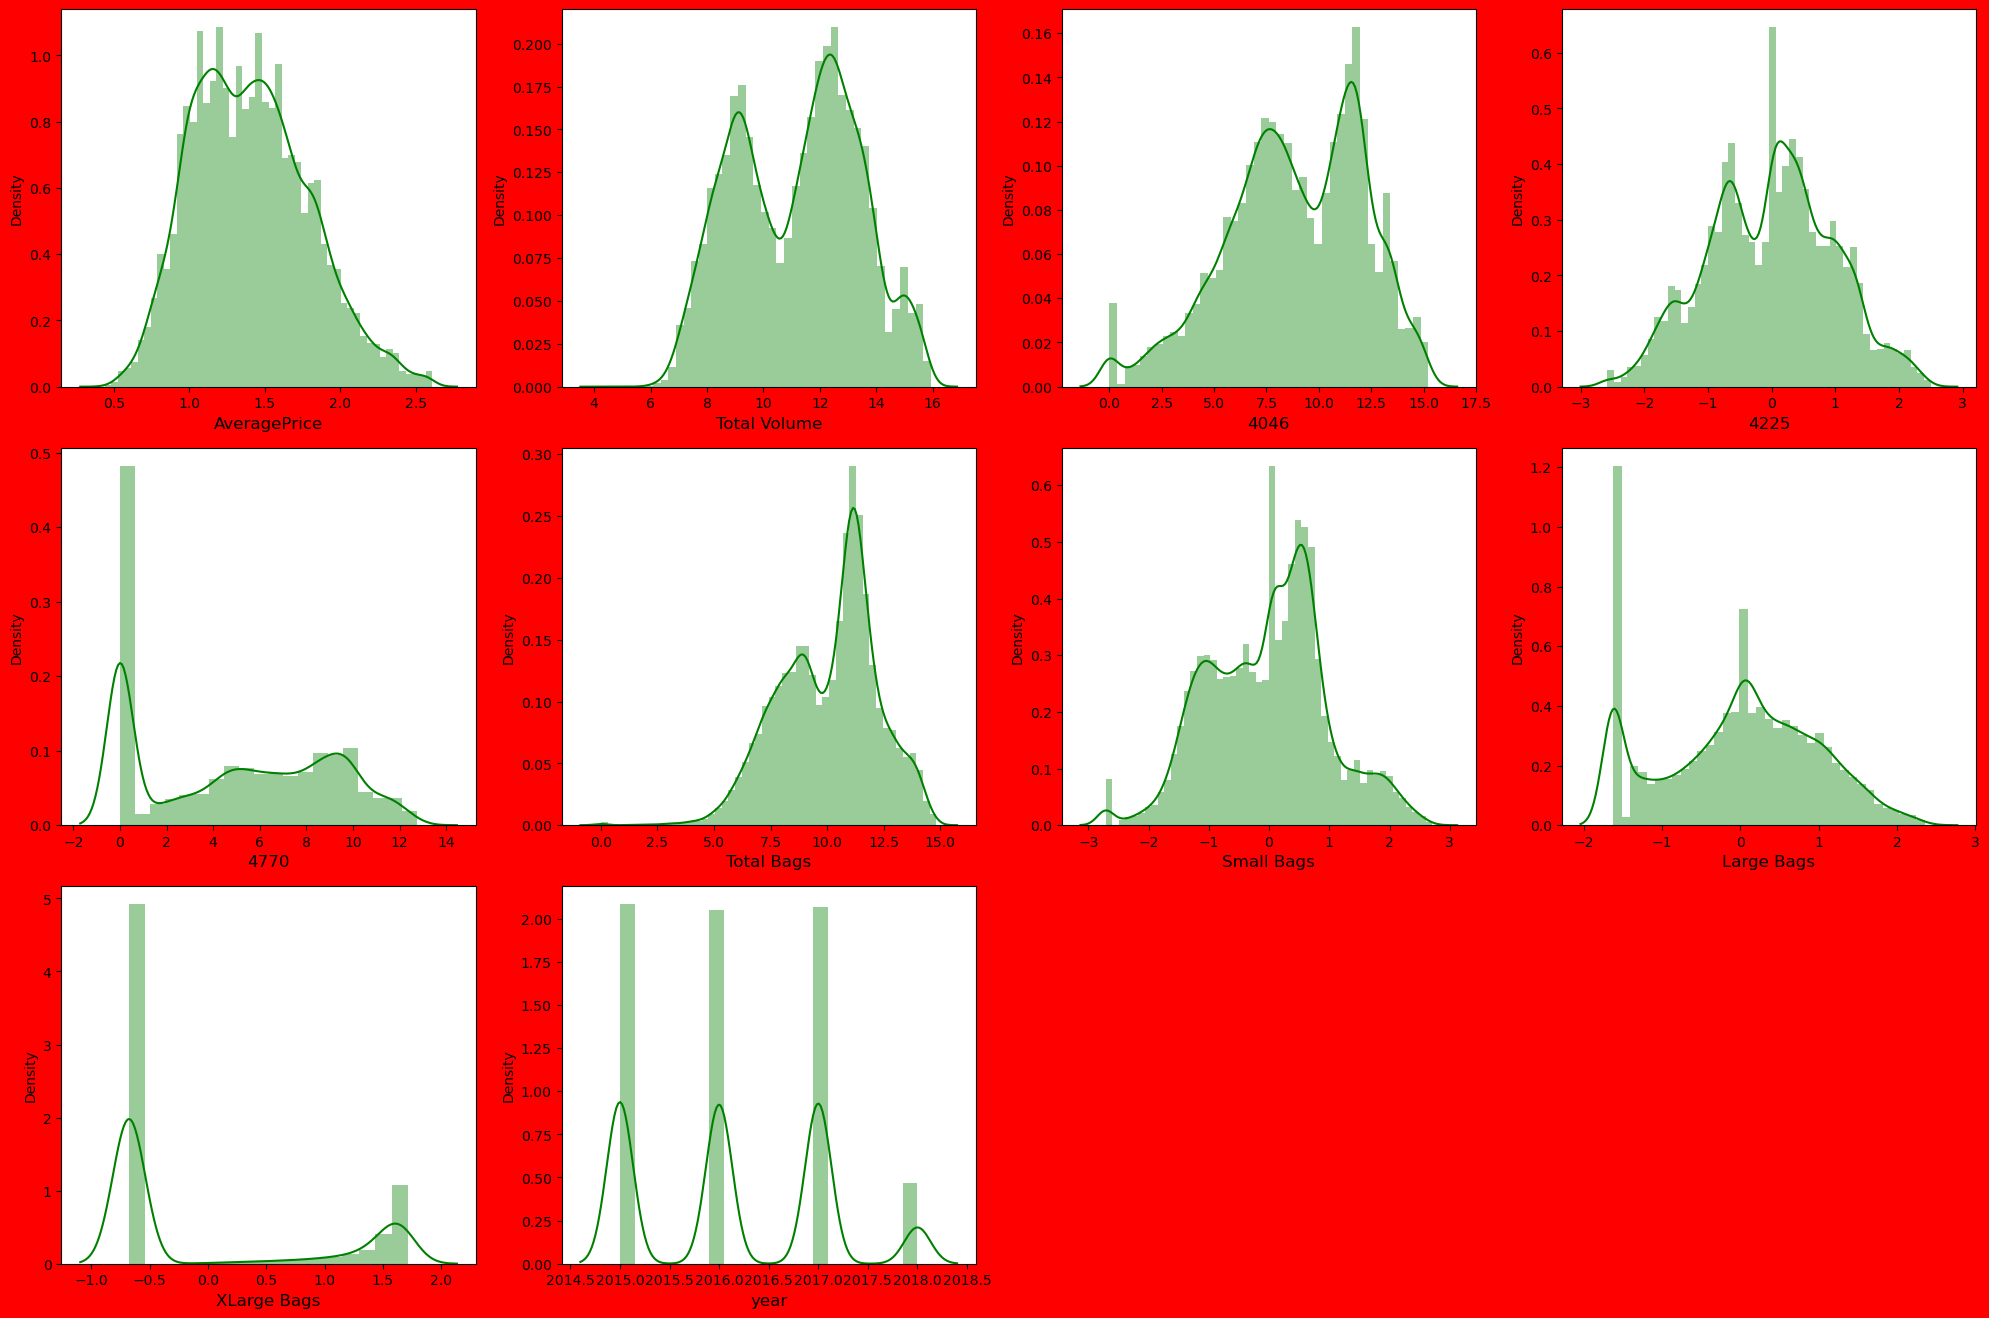

In [69]:
#Let's check how the data distributed to the numerical columns
plt.figure(figsize=(20,26),facecolor="r")
plot_number=1
for col in new_df.columns:
    if plot_number<=20:
        if new_df[col].dtypes=="object":
            continue
        plt.subplot(6,4,plot_number)
        sns.distplot(new_df[col],color="g")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plot_number+=1
plt.tight_layout()

**Observation:-**

Now you can see now our data distribution is in good shape.Earlier all the columns except AveragePrice column had right skewed data distribution but now you can see all the columns are atleast in a path of normal distribution where AveragePrice column data is normally distributed.

# Encoding Categorical columns

In [70]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

for i in new_df.columns:
    if new_df[i].dtypes=="object":
        new_df[i]=LE.fit_transform(new_df[i])
        
new_df

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0              1.33     11.070329  6.944801  0.351430  3.895080    9.070833   
1              1.35     10.912849  6.515127  0.269513  4.083115    9.159737   
2              0.93     11.680304  6.679222  0.649333  4.879007    9.005325   
3              1.08     11.277104  7.032624  0.468799  4.298373    8.667708   
4              1.28     10.840357  6.848515  0.262126  4.340944    8.729874   
...             ...           ...       ...       ...       ...         ...   
18244          1.63      9.745361  7.624599  0.048122  0.000000    9.510421   
18245          1.71      9.538783  7.083975  0.048122  0.000000    9.134090   
18246          1.87      9.530012  7.084159  0.048122  6.591591    9.147945   
18247          1.93      9.693089  7.332127  0.048122  6.590315    9.302969   
18248          1.62      9.769361  7.971006  0.048122  5.418453    9.393924   

       Small Bags  Large Bags  XLarge Bags  type  year  region  
0       -0.347421   -0.781153    -0.677919     0  2015       0  
1       -0.311322   -0.771198    -0.677919     0  2015       0  
2       -0.374453   -0.758523    -0.677919     0  2015       0  
3       -0.510991   -0.699123    -0.677919     0  2015       0  
4       -0.490534   -0.607027    -0.677919     0  2015       0  
...           ...         ...          ...   ...   ...     ...  
18244    0.076304    0.062718    -0.677919     1  2018      53  
18245    0.076304    0.062718    -0.677919     1  2018      53  
18246    0.076304    0.062718    -0.677919     1  2018      53  
18247    0.076304    0.062718    -0.677919     1  2018      53  
18248    0.076304    0.062718    -0.677919     1  2018      53  

[17651 rows x 12 columns]

**You can see all my region and type column is now encoded to numeric values.**

In [71]:
#Now I am checking what is my actual value in respect of encoded value
Actual_and_encoded = dict(zip(LE.classes_, LE.transform(LE.classes_)))

# Printing the dictionary with actual value as key and encoded value as it's value
for label, encoded_value in Actual_and_encoded.items():
    print(f"{label}: {encoded_value}")

Albany: 0
Atlanta: 1
BaltimoreWashington: 2
Boise: 3
Boston: 4
BuffaloRochester: 5
California: 6
Charlotte: 7
Chicago: 8
CincinnatiDayton: 9
Columbus: 10
DallasFtWorth: 11
Denver: 12
Detroit: 13
GrandRapids: 14
GreatLakes: 15
HarrisburgScranton: 16
HartfordSpringfield: 17
Houston: 18
Indianapolis: 19
Jacksonville: 20
LasVegas: 21
LosAngeles: 22
Louisville: 23
MiamiFtLauderdale: 24
Midsouth: 25
Nashville: 26
NewOrleansMobile: 27
NewYork: 28
Northeast: 29
NorthernNewEngland: 30
Orlando: 31
Philadelphia: 32
PhoenixTucson: 33
Pittsburgh: 34
Plains: 35
Portland: 36
RaleighGreensboro: 37
RichmondNorfolk: 38
Roanoke: 39
Sacramento: 40
SanDiego: 41
SanFrancisco: 42
Seattle: 43
SouthCarolina: 44
SouthCentral: 45
Southeast: 46
Spokane: 47
StLouis: 48
Syracuse: 49
Tampa: 50
TotalUS: 51
West: 52
WestTexNewMexico: 53


**Here you can see all my region column's actual value with it's encoded values.**

In [72]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17651 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  17651 non-null  float64
 1   Total Volume  17651 non-null  float64
 2   4046          17651 non-null  float64
 3   4225          17651 non-null  float64
 4   4770          17651 non-null  float64
 5   Total Bags    17651 non-null  float64
 6   Small Bags    17651 non-null  float64
 7   Large Bags    17651 non-null  float64
 8   XLarge Bags   17651 non-null  float64
 9   type          17651 non-null  int32  
 10  year          17651 non-null  int64  
 11  region        17651 non-null  int32  
dtypes: float64(9), int32(2), int64(1)
memory usage: 1.6 MB


**Here you can see all columns are now numeric type.There is no string datatype column is present.**

# Correlation between Target column and Independent columns

In [73]:
new_df.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.580300 -0.537346 -0.413043 -0.495013   
Total Volume     -0.580300      1.000000  0.875354  0.585830  0.818039   
4046             -0.537346      0.875354  1.000000  0.508374  0.725446   
4225             -0.413043      0.585830  0.508374  1.000000  0.551904   
4770             -0.495013      0.818039  0.725446  0.551904  1.000000   
Total Bags       -0.566986      0.928706  0.765438  0.536099  0.750909   
Small Bags       -0.389455      0.583492  0.505726  0.784332  0.508448   
Large Bags       -0.245467      0.347475  0.284886  0.615012  0.318633   
XLarge Bags      -0.370052      0.517368  0.459778  0.582079  0.524781   
type              0.613150     -0.800133 -0.713862 -0.693762 -0.778713   
year              0.091704      0.082434  0.002064 -0.022265 -0.051743   
region           -0.003242      0.068649  0.159353  0.009814  0.038776   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.566986   -0.389455   -0.245467    -0.370052  0.613150   
Total Volume    0.928706    0.583492    0.347475     0.517368 -0.800133   
4046            0.765438    0.505726    0.284886     0.459778 -0.713862   
4225            0.536099    0.784332    0.615012     0.582079 -0.693762   
4770            0.750909    0.508448    0.318633     0.524781 -0.778713   
Total Bags      1.000000    0.545668    0.338540     0.474290 -0.722171   
Small Bags      0.545668    1.000000    0.560048     0.596437 -0.649306   
Large Bags      0.338540    0.560048    1.000000     0.443307 -0.424841   
XLarge Bags     0.474290    0.596437    0.443307     1.000000 -0.639087   
type           -0.722171   -0.649306   -0.424841    -0.639087  1.000000   
year            0.225807    0.129255    0.122267     0.074503  0.003867   
region          0.064693    0.023597   -0.018055    -0.044466  0.018409   

                  year    region  
AveragePrice  0.091704 -0.003242  
Total Volume  0.082434  0.068649  
4046          0.002064  0.159353  
4225         -0.022265  0.009814  
4770         -0.051743  0.038776  
Total Bags    0.225807  0.064693  
Small Bags    0.129255  0.023597  
Large Bags    0.122267 -0.018055  
XLarge Bags   0.074503 -0.044466  
type          0.003867  0.018409  
year          1.000000 -0.004417  
region       -0.004417  1.000000

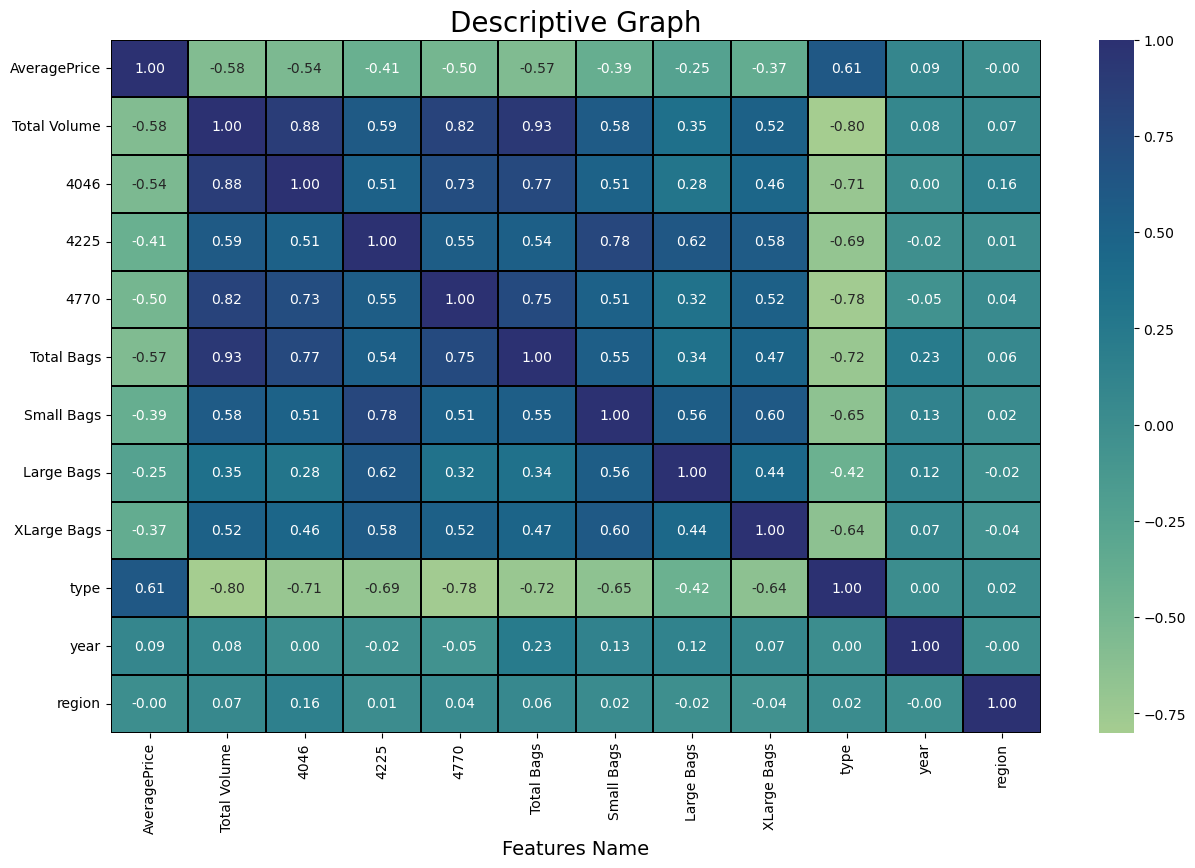

In [74]:
#Visualizing Correlation between Target variable and Independent variables using heatmap
plt.figure(figsize=(15,9))
sns.heatmap(new_df.corr(),cmap="crest",fmt="0.2f",linewidth="0.2",linecolor="black",annot=True)
plt.xlabel("Features Name",fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

**Observation:-**
    
1)4046,4770 and Total Bags has a strong positive correlation with Total Volume.

2) Type column has strong negatively correlated with Total Volume,4046,4770



In [75]:
#Checking our Target column(region) correlation with other independent features
new_df.corr()["region"].sort_values(ascending=True)

XLarge Bags    -0.044466
Large Bags     -0.018055
year           -0.004417
AveragePrice   -0.003242
4225            0.009814
type            0.018409
Small Bags      0.023597
4770            0.038776
Total Bags      0.064693
Total Volume    0.068649
4046            0.159353
region          1.000000
Name: region, dtype: float64

**Observation:-**
*1) Here you can see XLarge Bags and Large Bags have negative correlations with "region but the values are close to zero, means it's  a very weak negative relationship.*

*2) For "year" and "AveragePrice" they have very small negative correlations with our Target column region, that's mean it's  a weak negative relationship.*

*3) 4046,Total Volume,Total Bags and 4770 have positive correlations with our Target column.* 

*4) 4046 having the strongest positive correlation with our Target column*

# Separating Target column and Features

In [76]:
#Separating Target and Independent variable
x=new_df.iloc[:,:-1]
y=new_df.iloc[:,-1]

print("Features Dimension",x.shape)
print("Label dimension",y.shape)

Features Dimension (17651, 11)
Label dimension (17651,)


In [77]:
x.head(2)

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          1.33     11.070329  6.944801  0.351430  3.895080    9.070833   
1          1.35     10.912849  6.515127  0.269513  4.083115    9.159737   

   Small Bags  Large Bags  XLarge Bags  type  year  
0   -0.347421   -0.781153    -0.677919     0  2015  
1   -0.311322   -0.771198    -0.677919     0  2015

In [78]:
y.head(2)

0    0
1    0
Name: region, dtype: int32

# Feature scalling using StadardScaler

In [79]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)
x

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0         -0.195352     -0.061926 -0.587318  0.372075 -0.246207   -0.473426   
1         -0.143510     -0.134262 -0.719464  0.288397 -0.199437   -0.431908   
2         -1.232207      0.218259 -0.668997  0.676379 -0.001478   -0.504018   
3         -0.843387      0.033054 -0.560308  0.491965 -0.145897   -0.661685   
4         -0.324959     -0.167561 -0.616931  0.280852 -0.135308   -0.632653   
...             ...           ...       ...       ...       ...         ...   
17646      0.582289     -0.670535 -0.378245  0.062250 -1.215018   -0.268139   
17647      0.789660     -0.765424 -0.544515  0.062250 -1.215018   -0.443885   
17648      1.204402     -0.769453 -0.544458  0.062250  0.424488   -0.437415   
17649      1.359930     -0.694545 -0.468195  0.062250  0.424171   -0.365019   
17650      0.556367     -0.659511 -0.271708  0.062250  0.132697   -0.322543   

       Small Bags  Large Bags  XLarge Bags      type      year  
0       -0.340505   -0.787708    -0.652114 -1.019047 -1.210013  
1       -0.303702   -0.777554    -0.652114 -1.019047 -1.210013  
2       -0.368064   -0.764624    -0.652114 -1.019047 -1.210013  
3       -0.507263   -0.704035    -0.652114 -1.019047 -1.210013  
4       -0.486408   -0.610095    -0.652114 -1.019047 -1.210013  
...           ...         ...          ...       ...       ...  
17646    0.091482    0.073062    -0.652114  0.981309  1.980756  
17647    0.091482    0.073062    -0.652114  0.981309  1.980756  
17648    0.091482    0.073062    -0.652114  0.981309  1.980756  
17649    0.091482    0.073062    -0.652114  0.981309  1.980756  
17650    0.091482    0.073062    -0.652114  0.981309  1.980756  

[17651 rows x 11 columns]

# Checking Multicollinearity

In [80]:
#Finding VIF for each column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features Name"]=x.columns

In [81]:
vif

VIF Values Features Name
0     1.819663  AveragePrice
1    17.746880  Total Volume
2     4.663566          4046
3     3.632483          4225
4     3.705455          4770
5     9.777512    Total Bags
6     3.108885    Small Bags
7     1.713696    Large Bags
8     1.935536   XLarge Bags
9     4.797500          type
10    1.429237          year

**Observation:-**

Our default acceptable VIF value range is 10.So you can see all the columns are in below 10 except Total Volume so I can delete this column but you can see I have only 10 columns as input variable so I don't want to delete it.**  .

# Over Sampling

In [82]:
#Checking value counts of our Target variable
y.value_counts()

0     338
16    338
49    338
44    338
39    338
38    338
35    338
34    338
32    338
30    338
26    338
23    338
19    338
18    338
27    338
8     338
2     338
13    338
12    338
11    338
4     338
5     338
10    338
9     338
20    337
1     337
28    337
33    336
41    336
40    336
14    336
50    336
31    335
24    335
25    333
48    333
21    333
53    332
7     332
22    331
17    331
36    330
3     329
37    328
47    328
43    326
29    325
46    307
42    301
45    292
6     290
15    272
52    256
51    169
Name: region, dtype: int64

**Here you can see our Target variable has class imbalance issue and I have to fix this issue with SMOTE().**

In [83]:
#Over sampling the data
!pip install imblearn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [84]:
y.value_counts()

0     338
16    338
49    338
44    338
39    338
38    338
35    338
34    338
32    338
30    338
26    338
23    338
19    338
18    338
27    338
8     338
2     338
13    338
12    338
11    338
4     338
5     338
10    338
9     338
20    337
1     337
28    337
33    336
41    336
40    336
14    336
50    336
31    335
24    335
25    333
48    333
21    333
53    332
7     332
22    331
17    331
36    330
3     329
37    328
47    328
43    326
29    325
46    307
42    301
45    292
6     290
15    272
52    256
51    169
Name: region, dtype: int64

In [85]:
y1.value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
52    338
53    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
51    338
Name: region, dtype: int64

**Now you can see our Target variable y1 has no class imbalance issue.**

# Modeling

# Finding the best Random State

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
MaxAcc=0
MaxRs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>MaxAcc:
        MaxAcc=acc
        MaxRs=i
        
print("The best accuracy score is",MaxAcc,"at Random State",MaxRs)

The best accuracy score is 0.9430241051862673 at Random State 46


**So the best accuracy is 0.9430241051862673 at the random State 46.**

# Creating train_test_split

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=MaxRs)

# Classification Algorithms

In [88]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

**RandomForestClassifier**

In [89]:
#Checking accuracy for RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_RFC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_RFC))
print("Classification Report:-\n",classification_report(y_test,pred_RFC))

Accuracy Score:- 0.9404674945215485
Confution Matrix:-
 [[ 95   0   0 ...   0   0   0]
 [  0  94   0 ...   0   0   0]
 [  0   0  92 ...   0   0   0]
 ...
 [  0   0   0 ... 103   0   0]
 [  0   0   0 ...   1 100   0]
 [  0   0   0 ...   0   0 100]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       101
           1       0.92      0.97      0.94        97
           2       0.94      0.98      0.96        94
           3       0.96      0.90      0.93       100
           4       0.93      0.95      0.94        94
           5       0.97      0.93      0.95        92
           6       0.99      0.97      0.98        94
           7       0.98      0.91      0.95       114
           8       0.99      1.00      0.99        98
           9       0.96      0.92      0.94        97
          10       0.89      0.92      0.91       104
          11       0.90      0.95      0.92        97
          12       0.92 

**ExtraTreesClassifier**

In [90]:
#Checking accuracy for ExtraTreesClassifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_ETC=ETC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_ETC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_ETC))
print("Classification Report:-\n",classification_report(y_test,pred_ETC))

Accuracy Score:- 0.9578159240321402
Confution Matrix:-
 [[ 97   0   0 ...   0   0   0]
 [  0  94   0 ...   0   0   0]
 [  0   0  94 ...   0   0   0]
 ...
 [  0   0   0 ... 103   0   0]
 [  0   0   0 ...   0 100   0]
 [  0   0   0 ...   0   0 100]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       101
           1       0.95      0.97      0.96        97
           2       0.98      1.00      0.99        94
           3       0.95      0.92      0.93       100
           4       0.98      0.98      0.98        94
           5       0.97      0.93      0.95        92
           6       0.99      0.99      0.99        94
           7       0.99      0.96      0.97       114
           8       0.98      0.99      0.98        98
           9       0.97      0.94      0.95        97
          10       0.93      0.95      0.94       104
          11       0.94      0.94      0.94        97
          12       0.97 

**AdaBoostClassifier**

In [91]:
#Checking accuracy for AdaBoostClassifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_ABC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_ABC))
print("Classification Report:-\n",classification_report(y_test,pred_ABC))

Accuracy Score:- 0.044010226442658874
Confution Matrix:-
 [[ 0  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 ...
 [ 0  8  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.08      0.10      0.09        97
           2       0.00      0.00      0.00        94
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00        94
           5       0.00      0.00      0.00        92
           6       0.00      0.00      0.00        94
           7       0.00      0.00      0.00       114
           8       0.00      0.00      0.00        98
           9       0.00      0.00      0.00        97
          10       0.00      0.00      0.00       104
          11       0.00      0.00      0.00        97
          12       0.00      0.00      0.00       104
    

**GradientBoostingClassifier**

In [92]:
#Checking accuracy for GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
pred_GBC=GBC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_GBC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_GBC))
print("Classification Report:-\n",classification_report(y_test,pred_GBC))

Accuracy Score:- 0.8482468955441929
Confution Matrix:-
 [[ 84   0   0 ...   0   0   0]
 [  0  77   0 ...   0   0   2]
 [  0   0  87 ...   0   0   1]
 ...
 [  0   0   0 ... 102   1   0]
 [  0   0   0 ...   1  96   0]
 [  0   0   0 ...   0   0  86]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       101
           1       0.79      0.79      0.79        97
           2       0.90      0.93      0.91        94
           3       0.91      0.86      0.89       100
           4       0.81      0.85      0.83        94
           5       0.94      0.85      0.89        92
           6       0.96      0.96      0.96        94
           7       0.94      0.84      0.89       114
           8       0.97      0.95      0.96        98
           9       0.85      0.85      0.85        97
          10       0.83      0.82      0.82       104
          11       0.82      0.86      0.84        97
          12       0.86 

**BaggingClassifier**

In [93]:
#Checking accuracy for BaggingClassifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
pred_BC=BC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_BC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_BC))
print("Classification Report:-\n",classification_report(y_test,pred_BC))

Accuracy Score:- 0.8595690284879474
Confution Matrix:-
 [[ 85   1   0 ...   0   0   0]
 [  0  89   0 ...   0   0   0]
 [  0   0  89 ...   0   0   0]
 ...
 [  0   0   0 ... 103   0   0]
 [  0   0   0 ...   1  98   0]
 [  0   0   0 ...   0   0  83]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       101
           1       0.86      0.92      0.89        97
           2       0.80      0.95      0.87        94
           3       0.86      0.83      0.84       100
           4       0.78      0.94      0.85        94
           5       0.89      0.88      0.89        92
           6       0.88      0.91      0.90        94
           7       0.88      0.86      0.87       114
           8       0.94      0.92      0.93        98
           9       0.83      0.88      0.85        97
          10       0.79      0.86      0.82       104
          11       0.82      0.86      0.84        97
          12       0.83 

**DecisionTreeClassifier**

In [94]:
#Checking accuracy for DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred_DTC=DTC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_DTC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_DTC))
print("Classification Report:-\n",classification_report(y_test,pred_DTC))

Accuracy Score:- 0.7856099342585829
Confution Matrix:-
 [[ 65   0   0 ...   0   0   0]
 [  0  72   0 ...   0   0   1]
 [  0   0  81 ...   0   0   0]
 ...
 [  0   0   0 ... 102   0   0]
 [  0   0   0 ...   2  96   0]
 [  0   0   0 ...   0   0  74]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.74      0.64      0.69       101
           1       0.78      0.74      0.76        97
           2       0.81      0.86      0.84        94
           3       0.84      0.83      0.83       100
           4       0.68      0.85      0.75        94
           5       0.79      0.74      0.76        92
           6       0.89      0.88      0.89        94
           7       0.85      0.79      0.82       114
           8       0.93      0.87      0.90        98
           9       0.77      0.74      0.75        97
          10       0.74      0.72      0.73       104
          11       0.75      0.76      0.76        97
          12       0.70 

**KNeighborsClassifier**

In [95]:
#Checking accuracy for KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
pred_KNN=KNN.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_KNN))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_KNN))
print("Classification Report:-\n",classification_report(y_test,pred_KNN))

Accuracy Score:- 0.881300219138057
Confution Matrix:-
 [[ 92   0   0 ...   0   0   0]
 [  2  82   0 ...   0   0   0]
 [  0   3  85 ...   0   0   0]
 ...
 [  0   0   0 ... 102   1   0]
 [  0   0   0 ...   0  96   0]
 [  0   0   0 ...   0   0  96]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       101
           1       0.85      0.85      0.85        97
           2       0.83      0.90      0.87        94
           3       0.88      0.82      0.85       100
           4       0.91      0.93      0.92        94
           5       0.88      0.93      0.91        92
           6       0.98      0.90      0.94        94
           7       0.92      0.88      0.90       114
           8       0.97      0.93      0.95        98
           9       0.81      0.81      0.81        97
          10       0.76      0.82      0.79       104
          11       0.89      0.87      0.88        97
          12       0.90  

**SVC**

In [96]:
#Checking accuracy for SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_svc))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_svc))
print("Classification Report:-\n",classification_report(y_test,pred_svc))

Accuracy Score:- 0.8025931336742148
Confution Matrix:-
 [[ 88   0   0 ...   0   0   0]
 [  0  76   0 ...   0   0   0]
 [  0   1  83 ...   0   0   0]
 ...
 [  0   0   0 ... 103   0   0]
 [  0   0   0 ...   0  96   0]
 [  0   5   0 ...   0   0  63]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       101
           1       0.69      0.78      0.73        97
           2       0.82      0.88      0.85        94
           3       0.85      0.87      0.86       100
           4       0.90      0.89      0.90        94
           5       0.95      0.82      0.88        92
           6       0.94      0.89      0.92        94
           7       0.87      0.85      0.86       114
           8       0.98      0.96      0.97        98
           9       0.77      0.85      0.81        97
          10       0.68      0.81      0.74       104
          11       0.66      0.82      0.73        97
          12       0.85 

**MultinomialNB**

In [97]:
#Checking accuracy for MultinomialNB
try:
    MNB=MultinomialNB()
    MNB.fit(x_train,y_train)
    pred_MNB=MNB.predict(x_test)
    print("Accuracy Score:-",accuracy_score(y_test,pred_MNB))
    print("Confution Matrix:-\n",confusion_matrix(y_test,pred_MNB))
    print("Classification Report:-\n",classification_report(y_test,pred_MNB))
except ValueError:
    print("Negative values in data passed to MultinomialNB")

Negative values in data passed to MultinomialNB


**Observation:-**

Based on the accuracy ExtraTreesClassifier is the best model till now with 0.9578159240321402 Accuracy score but we all know that this is not actual accuracy we have to Cross check it with cross validation.

# Cross validation

In [98]:
from sklearn.model_selection import cross_val_score

**Cross validation of RandomForestClassifier**

In [99]:
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score of RandomForestClassifier and cross validation score is:-",(accuracy_score(y_test,pred_RFC)-score.mean())*100)

[0.55299918 0.73870173 0.71863014 0.68712329 0.39506849]
0.618504564334035
Difference between accuracy score of RandomForestClassifier and cross validation score is:- 32.196293018751355


**Cross validation of ExtraTreeClassifier**

In [100]:
score1=cross_val_score(ETC,x1,y1)
print(score1)
print(score1.mean())
print("Difference between accuracy score of ExtraTreeClassifier and cross validation score is:-",(accuracy_score(y_test,pred_ETC)-score1.mean())*100)

[0.57080252 0.69926048 0.73041096 0.67616438 0.4030137 ]
0.6159304075070444
Difference between accuracy score of ExtraTreeClassifier and cross validation score is:- 34.18855165250958


**Cross validation of AdaBoostClassifier**

In [101]:
score2=cross_val_score(ABC,x1,y1)
print(score2)
print(score2.mean())
print("Difference between accuracy score of AdaBoostClassifier and cross validation score is:-",(accuracy_score(y_test,pred_ABC)-score2.mean())*100)

[0.04628869 0.03779786 0.04410959 0.03506849 0.04493151]
0.04163922813415728
Difference between accuracy score of AdaBoostClassifier and cross validation score is:- 0.23709983085015915


**Cross validation of GradientBoostingClassifier**

In [102]:
score3=cross_val_score(GBC,x1,y1)
print(score3)
print(score3.mean())
print("Difference between accuracy score of GradientBoostingClassifier and cross validation score is:-",(accuracy_score(y_test,pred_GBC)-score3.mean())*100)

[0.46453027 0.67050123 0.62136986 0.5890411  0.32684932]
0.5344583544384538
Difference between accuracy score of GradientBoostingClassifier and cross validation score is:- 31.378854110573904


**Cross validation of BaggingClassifier**

In [103]:
score4=cross_val_score(BC,x1,y1)
print(score4)
print(score4.mean())
print("Difference between accuracy score of BaggingClassifier and cross validation score is:-",(accuracy_score(y_test,pred_BC)-score4.mean())*100)

[0.52259655 0.64776773 0.63123288 0.56794521 0.36356164]
0.5466208019570544
Difference between accuracy score of BaggingClassifier and cross validation score is:- 31.294822653089295


**Cross validation of DecisionTreeClassifier**

In [104]:
score5=cross_val_score(DTC,x1,y1)
print(score5)
print(score5.mean())
print("Difference between accuracy score of DecisionTreeClassifier and cross validation score is:-",(accuracy_score(y_test,pred_DTC)-score5.mean())*100)

[0.47630786 0.58011504 0.54712329 0.47424658 0.32136986]
0.4798325247727213
Difference between accuracy score of DecisionTreeClassifier and cross validation score is:- 30.57774094858616


**Cross validation of KNeighborsClassifier**

In [105]:
score6=cross_val_score(KNN,x1,y1)
print(score6)
print(score6.mean())
print("Difference between accuracy score of KNeighborsClassifier and cross validation score is:-",(accuracy_score(y_test,pred_KNN)-score6.mean())*100)

[0.29745275 0.40701178 0.53013699 0.48109589 0.30109589]
0.4033586594777937
Difference between accuracy score of KNeighborsClassifier and cross validation score is:- 47.79415596602633


**Cross validation of SVC**

In [106]:
score7=cross_val_score(svc,x1,y1)
print(score7)
print(score7.mean())
print("Difference between accuracy score of SVC and cross validation score is:-",(accuracy_score(y_test,pred_svc)-score7.mean())*100)

[0.34456313 0.45001369 0.56164384 0.58136986 0.34109589]
0.45573728346146486
Difference between accuracy score of SVC and cross validation score is:- 34.685585021274996


**Observation:-**

*1) So here you can see AdaBoostClassifier has the least difference between it's accuracy with it's cross_val_score but we can pick this model as our best model because it's own accuracy is very low so I have to find another model which has 2nd least difference between it's accuracy score with cross_val_score.*

*2) Now you can see DecisionTreeClassifier has the second least difference(30.5777..)between it's accuracy score with it's cross_val_score.*

*3) So DecisionTreeClassifier is our best model.*

# Hyper Parameter Tuning

In [108]:
#DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
paramiters={
    "criterion":["gini", "entropy", "log_loss"],
    "splitter":["best", "random"],
    "max_depth":[1, 4, 10, 20],
    "min_samples_split":[1.0, 0.05, 0.4, 2],
    "random_state":[1, 4, 10, 20]
    
}

In [109]:
GCV=GridSearchCV(DecisionTreeClassifier(),paramiters,cv=5)

In [110]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 4, 10, 20],
                         'min_samples_split': [1.0, 0.05, 0.4, 2],
                         'random_state': [1, 4, 10, 20],
                         'splitter': ['best', 'random']})

In [111]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_split': 2,
 'random_state': 10,
 'splitter': 'best'}

**Here is our best parameters values that I can use while building our final model.**

# Final Model

In [112]:
Final_model=DecisionTreeClassifier(criterion='entropy',max_depth = 20,min_samples_split= 2,random_state= 10,splitter= 'best')
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy Score is:",acc*100)

Accuracy Score is: 78.78013148283418


**Observation:-**
    
*1) So you can see earlier my DecisionTreeClassifier's accuracy was 0.7856.. now it is 78.7801 so you can clearly see my model accuracy is increased.*

# Saving the best model

**Serialization**

In [114]:
#Saving best model
import joblib
joblib.dump(Final_model,"Region_predict.pkl")

['Region_predict.pkl']

In [ ]:
**De-Derial

In [115]:
#Loading the model and try to make prediction with it.
Model=joblib.load("Region_predict.pkl")

prediction=Model.predict(x_test)
prediction

array([ 4, 50, 17, ...,  9, 10,  7])

In [116]:
#Checking the comparision between Actual and Predicted values
#Comparing orginal data with predicted one
Check=np.array(y_test)
Test=pd.DataFrame()
Test["Prediction"]=prediction
Test["Original"]=Check
Test

Prediction  Original
0              4         4
1             50        24
2             17        17
3              0         0
4             15        15
...          ...       ...
5471          50        50
5472          38        38
5473           9         9
5474          10        44
5475           7         7

[5476 rows x 2 columns]

# User Define Function to predict Region

In [130]:
#Here is my dictionary for my encoded value for region column
encoded_values_Region = {
        0: "Albany",
        1: "Atlanta",
        2: "BaltimoreWashington",
        3: "Boise",
        4: "Boston",
        5: "BuffaloRochester",
        6: "California",
        7: "Charlotte",
        8: "Chicago",
        9: "CincinnatiDayton",
        10: "Columbus",
        11: "DallasFtWorth",
        12: "Denver",
        13: "Detroit",
        14: "GrandRapids",
        15: "GreatLakes",
        16: "HarrisburgScranton",
        17: "HartfordSpringfield",
        18: "Houston",
        19: "Indianapolis",
        20: "Jacksonville",
        21: "LasVegas",
        22: "LosAngeles",
        23: "Louisville",
        24: "MiamiFtLauderdale",
        25: "Midsouth",
        26: "Nashville",
        27: "NewOrleansMobile",
        28: "NewYork",
        29: "Northeast",
        30: "NorthernNewEngland",
        31: "Orlando",
        32: "Philadelphia",
        33: "PhoenixTucson",
        34: "Pittsburgh",
        35: "Plains",
        36: "Portland",
        37: "RaleighGreensboro",
        38: "RichmondNorfolk",
        39: "Roanoke",
        40: "Sacramento",
        41: "SanDiego",
        42: "SanFrancisco",
        43: "Seattle",
        44: "SouthCarolina",
        45: "SouthCentral",
        46: "Southeast",
        47: "Spokane",
        48: "StLouis",
        49: "Syracuse",
        50: "Tampa",
        51: "TotalUS",
        52: "West",
        53: "WestTexNewMexico"
    }


#User define function that will predict the region
def Region_prediction(a,encoded_values_Region):


    a = a.reshape(1, -1)
    result = Model.predict(a)[0]

    if result in encoded_values_Region:
        print(f"The region is {encoded_values_Region[result]}.")


        


In [131]:
#Suppose this values are input by user
user_input=np.array([-0.195352,-0.061926,-0.587318,0.372075,-0.246207,-0.473426,-0.340505,-0.787708,-0.652114,-1.019047,-1.210013])

In [132]:
#Checking the prediction with our user define function
Region_prediction(user_input,encoded_values_Region)

The region is Albany.


# THE END

# So finding of Region using classification is done

# Now I strating to work on finding the average price using Regression

# Answer:-

**Observation:-**
    
So i completed the EDA part and analysis part of my data set df.So I am now continuing my average price prediction task from removing outliers part.

# Checking for outliers

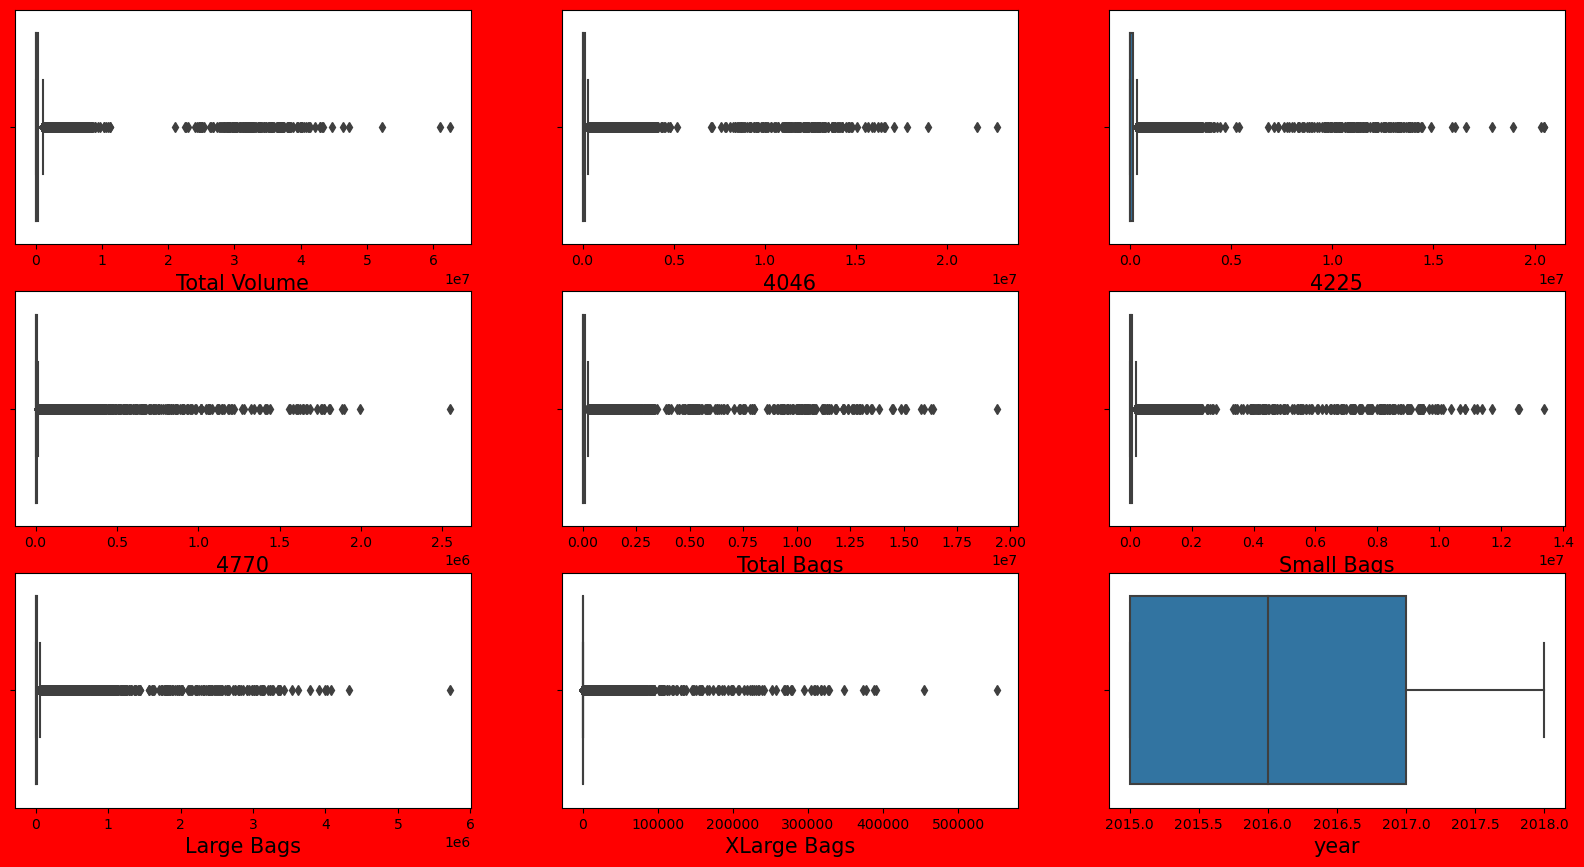

In [133]:
#Here I did not include the AveragePrice column because it's our Target column and also I did not select the type,and region column because that is categorical column 
numeric=df[["Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags","year"]]

#Checking outliers using boxplot
plt.figure(figsize=(20,25),facecolor="r")
plot=1

for i in numeric:
    if plot<=21:
    

        plt.subplot(7,3,plot)
        sns.boxplot(x=numeric[i])
        plt.xlabel(i,fontsize=15)
    plot+=1
    

plt.show()

**Observation:-**

1) Here you can see except year columns all columns have outliers.

2) For some column's boxplot you can't see the box and wishkers because those column's inside data are really close to each other.

# Removing Outliers

**Removing outliers using zscore**

In [134]:
#Inculding all columns those have outliers except our Target column and categorical columns to a variable named numeric1.
#Here I did not include the region column because it's our Target column and also I did not select the type column because that is categorical column 
numeric1=df[["Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]]
from scipy.stats import zscore
z1=np.abs(zscore(numeric1))
z1

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0          0.227716  0.230816  0.199902  0.212091    0.234170    0.232647   
1          0.230427  0.231103  0.208054  0.211997    0.233350    0.231568   
2          0.212085  0.231007  0.154478  0.211325    0.234730    0.233399   
3          0.223444  0.230741  0.185350  0.211864    0.237096    0.236568   
4          0.231538  0.230891  0.208719  0.211834    0.236718    0.236154   
...             ...       ...       ...       ...         ...         ...   
18244      0.241373  0.230017  0.243857  0.212540    0.229301    0.226665   
18245      0.242296  0.230693  0.242277  0.212540    0.233594    0.232196   
18246      0.242331  0.230693  0.243090  0.205766    0.233463    0.231644   
18247      0.241625  0.230428  0.242651  0.205774    0.231866    0.229543   
18248      0.241253  0.229347  0.243170  0.210450    0.230807    0.228111   

       Large Bags  XLarge Bags  
0        0.222352      0.17558  
1        0.222335      0.17558  
2        0.222311      0.17558  
3        0.222186      0.17558  
4        0.221924      0.17558  
...           ...          ...  
18244    0.220964      0.17558  
18245    0.221403      0.17558  
18246    0.222561      0.17558  
18247    0.222529      0.17558  
18248    0.222628      0.17558  

[18249 rows x 8 columns]

In [135]:
#Locating outliers location
np.where(z1>3)

(array([ 346,  359,  780, ..., 9111, 9112, 9113], dtype=int64),
 array([1, 1, 7, ..., 6, 6, 6], dtype=int64))

In [136]:
#Checking zscore value by giving the row and column location
z1.iloc[346,1]

3.199410614794124

**You can see the zscore value is above 3 that means it as outlier.**

# Creating outlliers free dataset

In [137]:
otfree_dataset=df[(z1<3).all(axis=1)]
otfree_dataset.shape

(17782, 12)

In [139]:
print("Old DataFrame",df.shape[0])
print("New DataFrame",otfree_dataset.shape[0])

Old DataFrame 18249
New DataFrame 17782


In [140]:
print("The data lost percentage after removing outliers is",((df.shape[0]-otfree_dataset.shape[0])/df.shape[0])*100)

The data lost percentage after removing outliers is 2.55904433119623


**Here you can see only 2% data I lostb as outliers and I can afford it.**

# Checking data distribution for each numeric column again

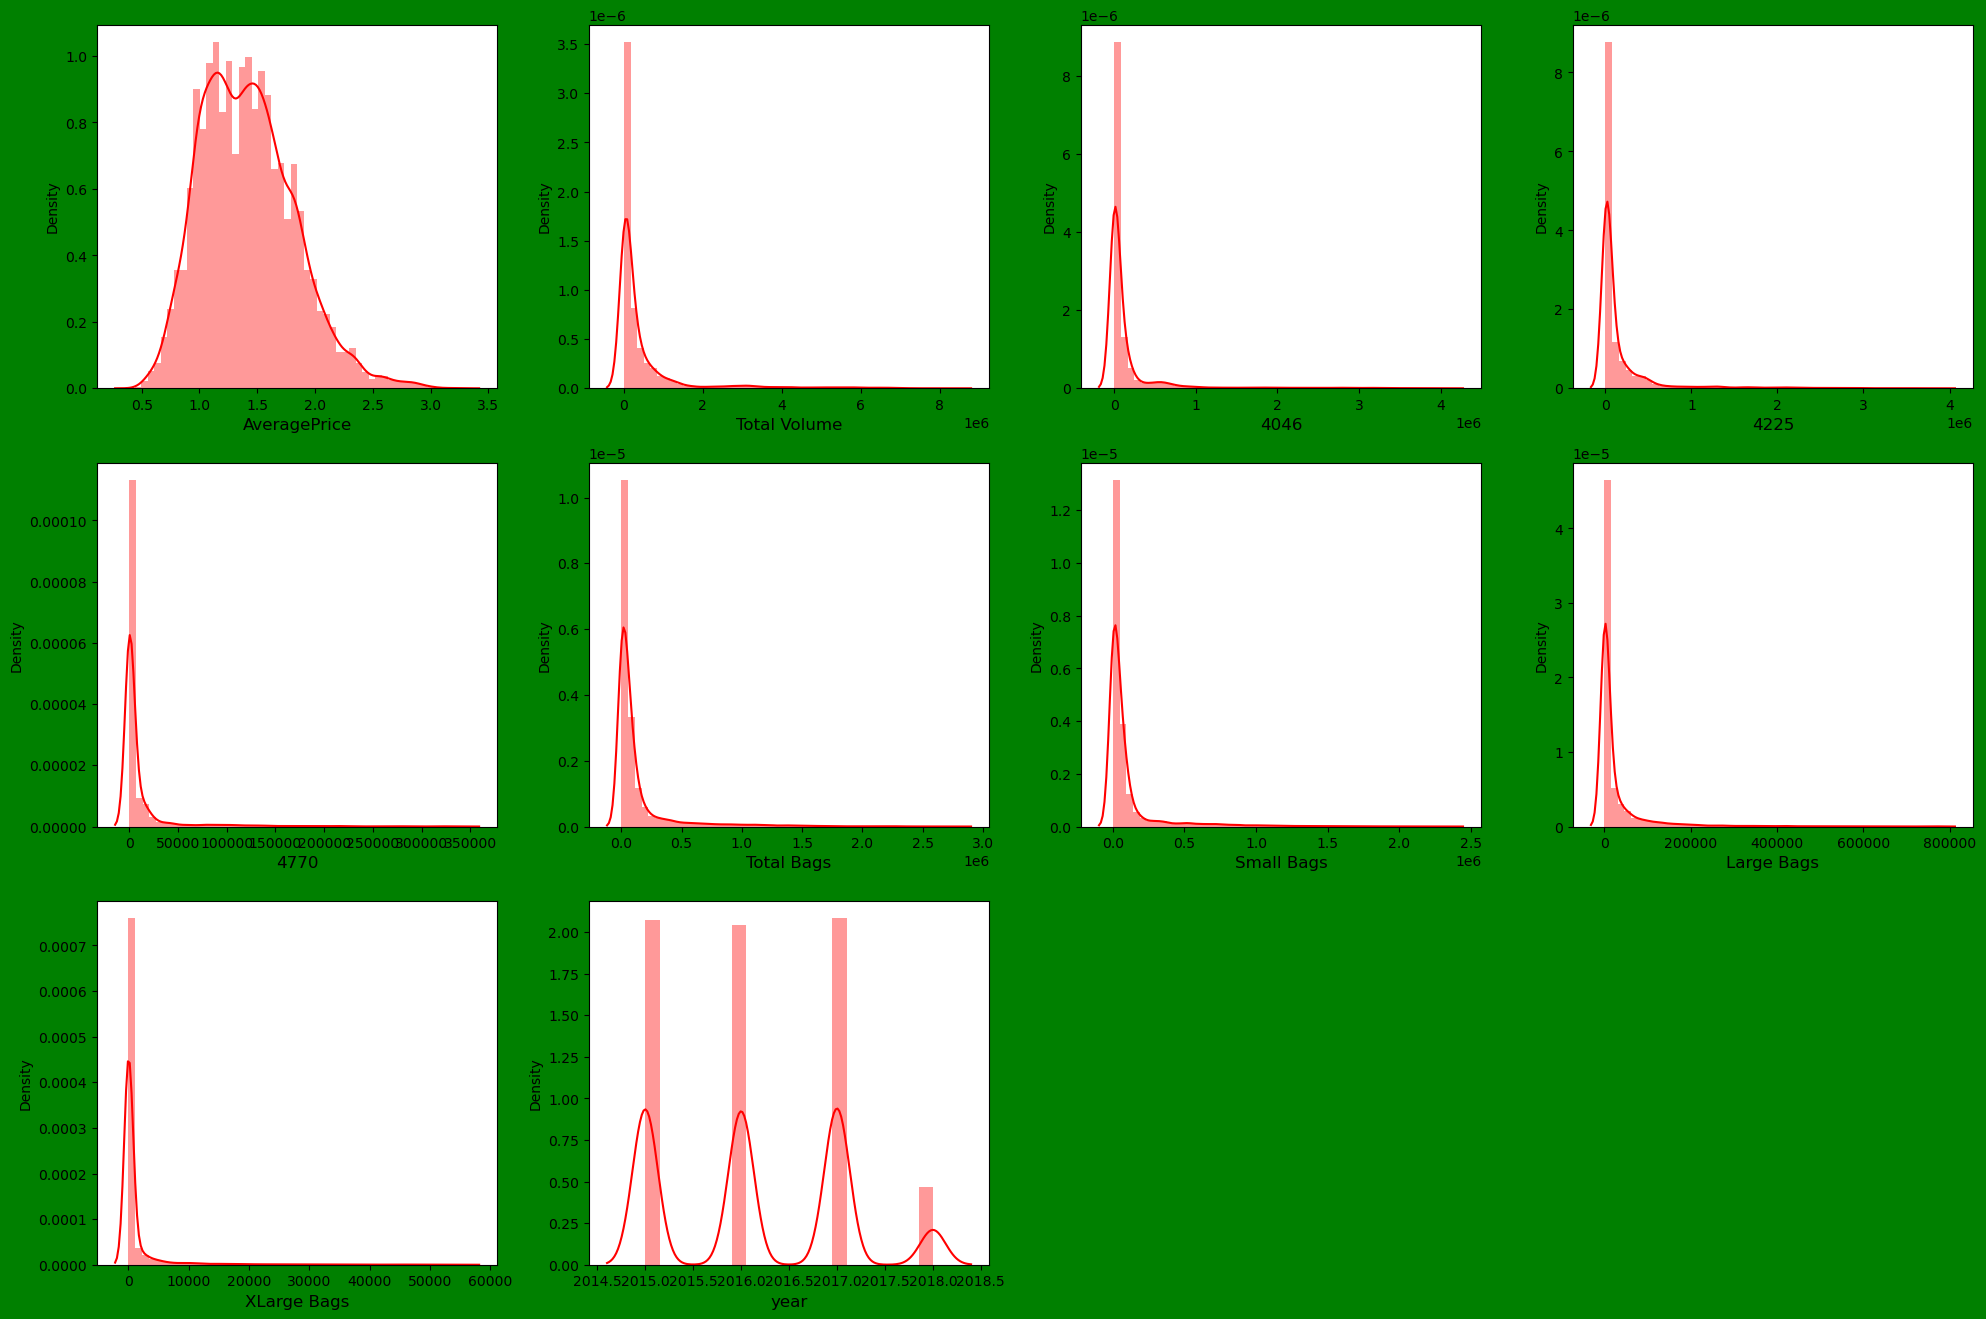

In [141]:
#Let's check how the data distributed to the numerical columns
plt.figure(figsize=(20,26),facecolor="g")
plot_number=1
for col in otfree_dataset.columns:
    if plot_number<=20:
        if otfree_dataset[col].dtypes=="object":
            continue
        plt.subplot(6,4,plot_number)
        sns.distplot(otfree_dataset[col],color="r")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plot_number+=1
plt.tight_layout()

**Observation:-**
    
1) Here you can see our target column that is AveragePrice is almost normally distributed.

2) For rest of the columns most of them are right skewed data.

# Checking Skewness

In [142]:
otfree_dataset.skew().to_frame("Skewness value")

Skewness value
AveragePrice        0.560969
Total Volume        3.782060
4046                4.928850
4225                4.472729
4770                5.137120
Total Bags          4.082103
Small Bags          4.238647
Large Bags          5.072468
XLarge Bags         6.159391
year                0.220792

**Observation:-**

*1) Our acceptable range for skewness value is +0.5 to -0.5 and here except year and AveragePrice columns all columns are above that range so we have to reduce these columns skewness.*

*2) Here column region and type columns are missing becasue those are categorical columns and we don't have to chaeck their skewness because of that.Also year column is also a categorical column so we can ignore it's skewness also although it's in our acceptable range.*

*3) If I would found our Target column(AveragePrice) is also out of range then also we could ignore it's skewness value.

# Removeing skewness

In [143]:
#Trying to reduce skewness using cube root method
a=otfree_dataset["Total Volume"]
b=otfree_dataset["4046"]
c=otfree_dataset["4225"]
d=otfree_dataset["4770"]
e=otfree_dataset["Total Bags"]
f=otfree_dataset["Small Bags"]
g=otfree_dataset["Large Bags"]
h=otfree_dataset["XLarge Bags"]


a=np.cbrt(a)
b=np.cbrt(b)
c=np.cbrt(c)
d=np.cbrt(d)
e=np.cbrt(e)
f=np.cbrt(f)
g=np.cbrt(g)
h=np.cbrt(h)


print("Total Volume skewness:",a.skew())
print("4046 skewness:",b.skew())
print("4225 skewness:",c.skew())
print("4770 skewness:",d.skew())
print("Total Bags skewness:",e.skew())
print("Small Bags skewness:",f.skew())
print("Large Bags skewness:",g.skew())
print("XLarge Bags skewness:",h.skew())


Total Volume skewness: 1.2486343100869959
4046 skewness: 1.5646168047391995
4225 skewness: 1.2867187221243055
4770 skewness: 1.6451484024395806
Total Bags skewness: 1.2371364890734367
Small Bags skewness: 1.2513532927877744
Large Bags skewness: 1.2827040377149084
XLarge Bags skewness: 2.2889328747672284


**Here you can see all columns skewness is reduced but it's not in acceptable range.So we have to try other transformations.**

In [144]:
#Trying to reduce skewness using sqrt method
a=otfree_dataset["Total Volume"]
b=otfree_dataset["4046"]
c=otfree_dataset["4225"]
d=otfree_dataset["4770"]
e=otfree_dataset["Total Bags"]
f=otfree_dataset["Small Bags"]
g=otfree_dataset["Large Bags"]
h=otfree_dataset["XLarge Bags"]


a=np.sqrt(a)
b=np.sqrt(b)
c=np.sqrt(c)
d=np.sqrt(d)
e=np.sqrt(e)
f=np.sqrt(f)
g=np.sqrt(g)
h=np.sqrt(h)


print("Total Volume skewness:",a.skew())
print("4046 skewness:",b.skew())
print("4225 skewness:",c.skew())
print("4770 skewness:",d.skew())
print("Total Bags skewness:",e.skew())
print("Small Bags skewness:",f.skew())
print("Large Bags skewness:",g.skew())
print("XLarge Bags skewness:",h.skew())

Total Volume skewness: 1.9725393717250588
4046 skewness: 2.5079596486974385
4225 skewness: 2.138625125355314
4770 skewness: 2.6481911551212143
Total Bags skewness: 2.0178752260936914
Small Bags skewness: 2.100896339635038
Large Bags skewness: 2.245865505141616
XLarge Bags skewness: 3.3270548895443772


**Still not working.have to try other transformations.**

In [145]:
#Trying to reduce skewness using log method
a=otfree_dataset["Total Volume"]
b=otfree_dataset["4046"]
c=otfree_dataset["4225"]
d=otfree_dataset["4770"]
e=otfree_dataset["Total Bags"]
f=otfree_dataset["Small Bags"]
g=otfree_dataset["Large Bags"]
h=otfree_dataset["XLarge Bags"]


a=np.log(a)
b=np.log(b)
c=np.log(c)
d=np.log(d)
e=np.log(e)
f=np.log(f)
g=np.log(g)
h=np.log(h)


print("Total Volume skewness:",a.skew())
print("4046 skewness:",b.skew())
print("4225 skewness:",c.skew())
print("4770 skewness:",d.skew())
print("Total Bags skewness:",e.skew())
print("Small Bags skewness:",f.skew())
print("Large Bags skewness:",g.skew())
print("XLarge Bags skewness:",h.skew())

Total Volume skewness: -0.03918349537232803
4046 skewness: nan
4225 skewness: nan
4770 skewness: nan
Total Bags skewness: nan
Small Bags skewness: nan
Large Bags skewness: nan
XLarge Bags skewness: nan


**So you can see for one of the column log method works and I will have to implement log method on Total Volume column permanently.Lets see:**

In [146]:
#Applying log method permanently on Total Volume column
otfree_dataset["Total Volume"]= np.log(otfree_dataset["Total Volume"])

In [147]:
#Checking the skewness again
otfree_dataset.skew()

AveragePrice    0.560969
Total Volume   -0.039183
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
dtype: float64

**So you can see Total Volume column skewness is reduced.Lets use other transformation on rest of the columns.**

In [148]:
#Trying to reduce skewness using log+1p method
b=otfree_dataset["4046"]
c=otfree_dataset["4225"]
d=otfree_dataset["4770"]
e=otfree_dataset["Total Bags"]
f=otfree_dataset["Small Bags"]
g=otfree_dataset["Large Bags"]
h=otfree_dataset["XLarge Bags"]



b=np.log1p(b)
c=np.log1p(c)
d=np.log1p(d)
e=np.log1p(e)
f=np.log1p(f)
g=np.log1p(g)
h=np.log1p(h)


print("4046 skewness:",b.skew())
print("4225 skewness:",c.skew())
print("4770 skewness:",d.skew())
print("Total Bags skewness:",e.skew())
print("Small Bags skewness:",f.skew())
print("Large Bags skewness:",g.skew())
print("XLarge Bags skewness:",h.skew())

4046 skewness: -0.4088267814904314
4225 skewness: -0.5953600951901168
4770 skewness: 0.07907358092226378
Total Bags skewness: -0.3943467909567718
Small Bags skewness: -0.7828752300547012
Large Bags skewness: -0.6038301520843947
XLarge Bags skewness: 1.2259257194903417


**Here you can see 4046,4770,Total Bags these columns skewness has been reduced by using log+1p method so I am now going to implement log+1p method on these column permanently.**

In [149]:
#Applying log1p method permanently on selected column
otfree_dataset["4046"]= np.log1p(otfree_dataset["4046"])
otfree_dataset["4770"]= np.log1p(otfree_dataset["4770"])
otfree_dataset["Total Bags"]= np.log1p(otfree_dataset["Total Bags"])

In [150]:
#Checking the skewness again
otfree_dataset.skew()

AveragePrice    0.560969
Total Volume   -0.039183
4046           -0.408827
4225            4.472729
4770            0.079074
Total Bags     -0.394347
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
dtype: float64

**You can see 4046,4770,Total Bags these columns skewness has been reduced by using log+1p method.**

In [151]:
#using PowerTransformer to reduce the skewness of rest of the columns
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer("yeo-johnson")   #yeo-johnson method works on both positive and Negative method

c=otfree_dataset["4225"]
f=otfree_dataset["Small Bags"]
g=otfree_dataset["Large Bags"]
h=otfree_dataset["XLarge Bags"]

#Reshaping the columns because power transformar need 2d array instead 1d
c_reshape=a.values.reshape(-1,1)
f_reshape=b.values.reshape(-1,1)
g_reshape=e.values.reshape(-1,1)
h_reshape=f.values.reshape(-1,1)

#Now fitting the Transformer
c_transform=pt.fit_transform(c_reshape)
f_transform=pt.fit_transform(f_reshape)
g_transform=pt.fit_transform(g_reshape)
h_transform=pt.fit_transform(h_reshape)

#Convert the transformed array back to the DataFrame
c=pd.DataFrame(c_transform)
f=pd.DataFrame(f_transform)
g=pd.DataFrame(g_transform)
h=pd.DataFrame(h_transform)

print("4225 skewness:",c.skew())
print("Small Bags skewness:",f.skew())
print("Large Bags skewness:",g.skew())
print("XLarge Bags skewness:",h.skew())


4225 skewness: 0   -0.057699
dtype: float64
Small Bags skewness: 0   -0.15943
dtype: float64
Large Bags skewness: 0   -0.064486
dtype: float64
XLarge Bags skewness: 0   -0.024657
dtype: float64


**Here you can see all the columns are now in my acceptable range so I will reduce this columns skewness permanently by using PowerTransfromar.**

In [154]:
#Applying PowerTransformer to reduce the skewness permanently for selected columns
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer("yeo-johnson")   #yeo-johnson method works on both positive and Negative method

c_4225_reshape=otfree_dataset["4225"].values.reshape(-1,1)
S_Bags_reshape=otfree_dataset["Small Bags"].values.reshape(-1,1)
L_Bags_reshape=otfree_dataset["Large Bags"].values.reshape(-1,1)
XL_Bags_reshape=otfree_dataset["XLarge Bags"].values.reshape(-1,1)

#Now fitting the Transformer
c_4225_transform=pt.fit_transform(c_4225_reshape)
S_Bags_transform=pt.fit_transform(S_Bags_reshape)
L_Bags_transform=pt.fit_transform(L_Bags_reshape)
XL_Bags_transform=pt.fit_transform(XL_Bags_reshape)

#Converting transformed array back to the DataFrame
otfree_dataset["4225"]=pd.DataFrame(c_4225_transform)
otfree_dataset["Small Bags"]=pd.DataFrame(S_Bags_transform)
otfree_dataset["Large Bags"]=pd.DataFrame(L_Bags_transform)
otfree_dataset["XLarge Bags"]=pd.DataFrame(XL_Bags_transform)

In [155]:
#Checking the skewness again
otfree_dataset.skew()

AveragePrice    0.560969
Total Volume   -0.039183
4046           -0.408827
4225           -0.035558
4770            0.079074
Total Bags     -0.394347
Small Bags     -0.006791
Large Bags     -0.094140
XLarge Bags     0.902375
year            0.220792
dtype: float64

**Here you can see XLarge Bags column's skewness is still out of our acceptable range so I am going to apply boxcox on this column.Lets see:**

In [156]:
#Appliing boxcox to  XLarge Bags column
try:
    from scipy.stats import boxcox
    h=otfree_dataset["XLarge Bags"]
    h=boxcox(h)
    print("XLarge Bags skewness:",h.skew())
    
except:
    print("Data must be positive")

Data must be positive


**Here you can see boxcox will not work because all data must be positive.**

**Observation:-**

1) Apart from XLarge Bags column all column are in our acceptable skewness value range that is +0.5 to -0.5.

2) I tried cbrt,log,log1p,sqrt,PowerTranformer and boxcox to the XLarge Bags column to reduced it's skewness but it's skewness value never came to the acceptable range so I have to consider this column's skewness value as it's threshold skewness value or it's default skewness value and I have to ignore it.

In [157]:
#checking null value again
otfree_dataset.isnull().sum()

AveragePrice      0
Total Volume      0
4046              0
4225            467
4770              0
Total Bags        0
Small Bags      467
Large Bags      467
XLarge Bags     467
type              0
year              0
region            0
dtype: int64

**Here you can see after using the powerTransformer 4225,Small Bags,Large Bags,XLarge Bags columns get some null value again so I have to fill this values.As these all columns have numeric values so I can use mean or median to to fill these columns null value.I prefer to use median because by using median I can avoid the outliers problem also.**

In [158]:
#Using median method to fill the null values for 4225,Small Bags,Large Bags,XLarge Bags columns
otfree_dataset["4225"].fillna(otfree_dataset["4225"].median(),inplace=True)
otfree_dataset["Small Bags"].fillna(otfree_dataset["Small Bags"].median(),inplace=True)
otfree_dataset["Large Bags"].fillna(otfree_dataset["Large Bags"].median(),inplace=True)
otfree_dataset["XLarge Bags"].fillna(otfree_dataset["XLarge Bags"].median(),inplace=True)

In [159]:
#checking null value again
otfree_dataset.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

**Now you can see there is no null value present in any column.**

# Checking the data distribution again after removing the skewness from the dataset.

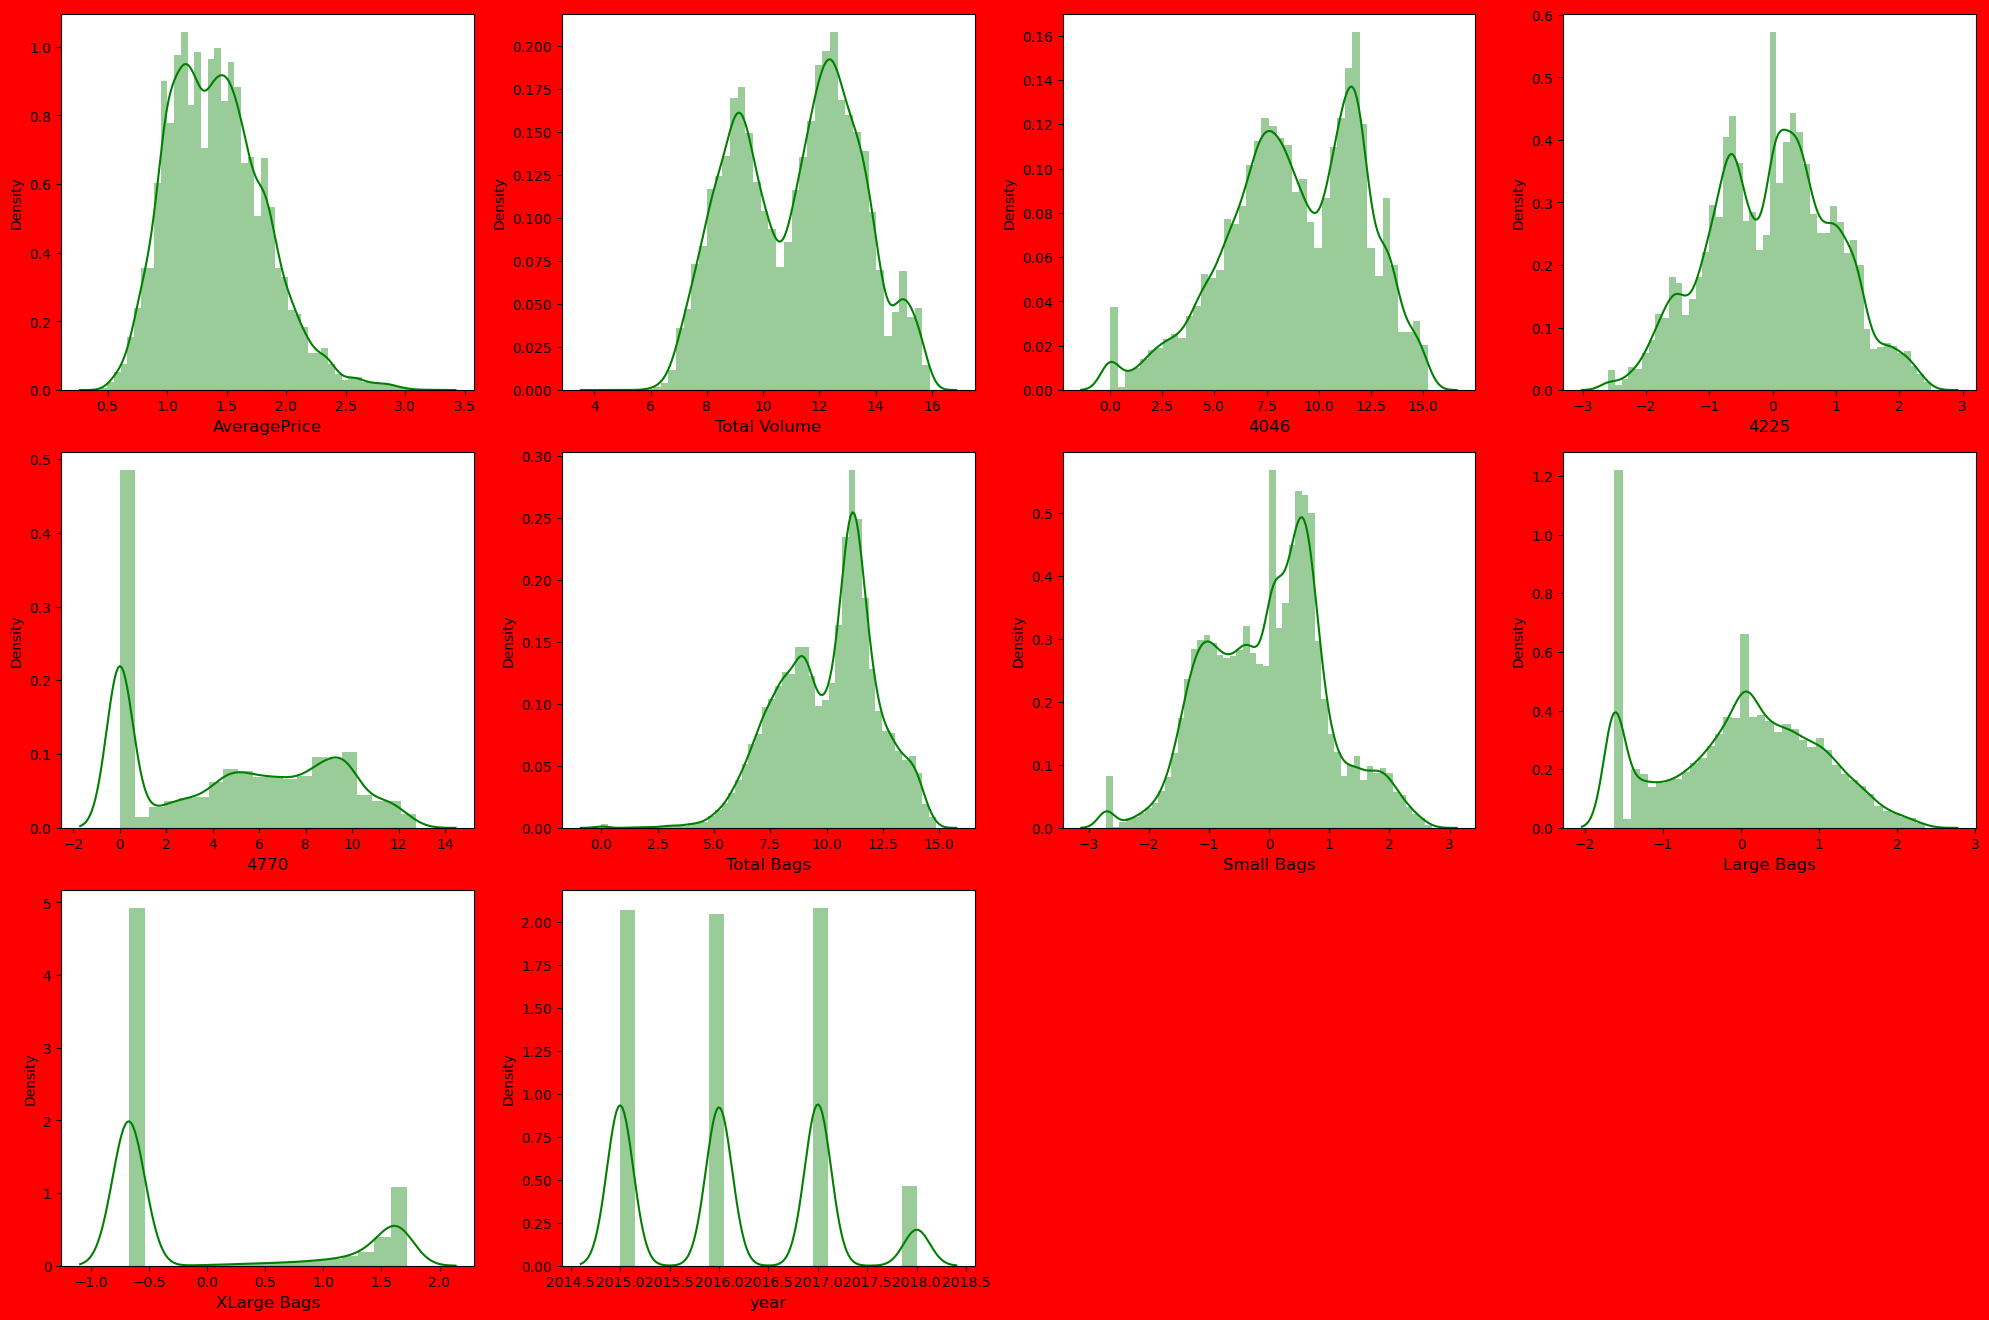

In [160]:
#Let's check how the data distributed to the numerical columns
plt.figure(figsize=(20,26),facecolor="r")
plot_number=1
for col in otfree_dataset.columns:
    if plot_number<=20:
        if otfree_dataset[col].dtypes=="object":
            continue
        plt.subplot(6,4,plot_number)
        sns.distplot(otfree_dataset[col],color="g")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plot_number+=1
plt.tight_layout()

**Observation:-**

Now you can see now our data distribution is in good shape.Earlier all the columns except AveragePrice column had right skewed data distribution but now you can see all the columns are atleast in a path of normal distribution.

# Encoding Categorical Columns

In [161]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

for i in otfree_dataset.columns:
    if otfree_dataset[i].dtypes=="object":
        otfree_dataset[i]=LE.fit_transform(otfree_dataset[i])
        
otfree_dataset

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0              1.33     11.070329  6.944801  0.358278  3.895080    9.070833   
1              1.35     10.912849  6.515127  0.276355  4.083115    9.159737   
2              0.93     11.680304  6.679222  0.656010  4.879007    9.005325   
3              1.08     11.277104  7.032624  0.475615  4.298373    8.667708   
4              1.28     10.840357  6.848515  0.268966  4.340944    8.729874   
...             ...           ...       ...       ...       ...         ...   
18244          1.63      9.745361  7.624599  0.036656  0.000000    9.510421   
18245          1.71      9.538783  7.083975  0.036656  0.000000    9.134090   
18246          1.87      9.530012  7.084159  0.036656  6.591591    9.147945   
18247          1.93      9.693089  7.332127  0.036656  6.590315    9.302969   
18248          1.62      9.769361  7.971006  0.036656  5.418453    9.393924   

       Small Bags  Large Bags  XLarge Bags  type  year  region  
0       -0.337064   -0.775214    -0.675702     0  2015       0  
1       -0.301038   -0.765237    -0.675702     0  2015       0  
2       -0.364044   -0.752534    -0.675702     0  2015       0  
3       -0.500341   -0.693012    -0.675702     0  2015       0  
4       -0.479918   -0.600755    -0.675702     0  2015       0  
...           ...         ...          ...   ...   ...     ...  
18244    0.069222    0.057380    -0.675702     1  2018      53  
18245    0.069222    0.057380    -0.675702     1  2018      53  
18246    0.069222    0.057380    -0.675702     1  2018      53  
18247    0.069222    0.057380    -0.675702     1  2018      53  
18248    0.069222    0.057380    -0.675702     1  2018      53  

[17782 rows x 12 columns]

**You can see all my region and type column is now encoded to numeric values.**

In [162]:
#Chacking the info of out dataset again
otfree_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17782 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  17782 non-null  float64
 1   Total Volume  17782 non-null  float64
 2   4046          17782 non-null  float64
 3   4225          17782 non-null  float64
 4   4770          17782 non-null  float64
 5   Total Bags    17782 non-null  float64
 6   Small Bags    17782 non-null  float64
 7   Large Bags    17782 non-null  float64
 8   XLarge Bags   17782 non-null  float64
 9   type          17782 non-null  int32  
 10  year          17782 non-null  int64  
 11  region        17782 non-null  int32  
dtypes: float64(9), int32(2), int64(1)
memory usage: 1.6 MB


**Here you can see all columns are now numeric type.There is no string datatype column is present.**

# Correlation between Target column and Independent columns

In [163]:
otfree_dataset.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.576954 -0.531830 -0.377904 -0.492918   
Total Volume     -0.576954      1.000000  0.875507  0.569264  0.818349   
4046             -0.531830      0.875507  1.000000  0.487401  0.724934   
4225             -0.377904      0.569264  0.487401  1.000000  0.560601   
4770             -0.492918      0.818349  0.724934  0.560601  1.000000   
Total Bags       -0.567930      0.926452  0.763258  0.507878  0.750925   
Small Bags       -0.349263      0.595827  0.501997  0.782369  0.534642   
Large Bags       -0.213245      0.347341  0.275670  0.614633  0.335157   
XLarge Bags      -0.361485      0.516920  0.458866  0.582278  0.522635   
type              0.608447     -0.801028 -0.714668 -0.696268 -0.779431   
year              0.099910      0.077913 -0.001748 -0.037812 -0.053770   
region            0.010428      0.065469  0.157078  0.011082  0.034927   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.567930   -0.349263   -0.213245    -0.361485  0.608447   
Total Volume    0.926452    0.595827    0.347341     0.516920 -0.801028   
4046            0.763258    0.501997    0.275670     0.458866 -0.714668   
4225            0.507878    0.782369    0.614633     0.582278 -0.696268   
4770            0.750925    0.534642    0.335157     0.522635 -0.779431   
Total Bags      1.000000    0.549909    0.336898     0.474004 -0.722288   
Small Bags      0.549909    1.000000    0.559520     0.595862 -0.652860   
Large Bags      0.336898    0.559520    1.000000     0.444609 -0.427424   
XLarge Bags     0.474004    0.595862    0.444609     1.000000 -0.639041   
type           -0.722288   -0.652860   -0.427424    -0.639041  1.000000   
year            0.222253    0.113726    0.113711     0.074675  0.007399   
region          0.058726    0.033823   -0.017649    -0.047436  0.021970   

                  year    region  
AveragePrice  0.099910  0.010428  
Total Volume  0.077913  0.065469  
4046         -0.001748  0.157078  
4225         -0.037812  0.011082  
4770         -0.053770  0.034927  
Total Bags    0.222253  0.058726  
Small Bags    0.113726  0.033823  
Large Bags    0.113711 -0.017649  
XLarge Bags   0.074675 -0.047436  
type          0.007399  0.021970  
year          1.000000 -0.003610  
region       -0.003610  1.000000

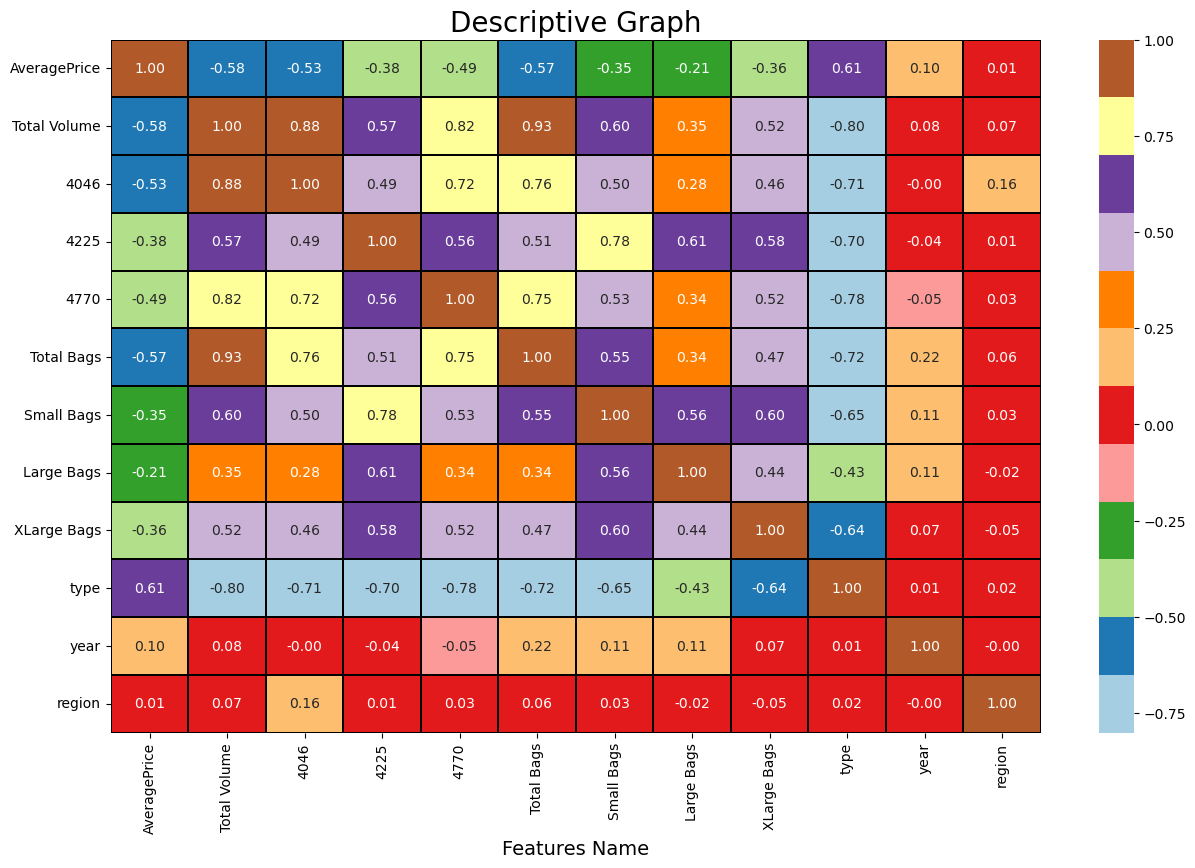

In [164]:
#Visualizing Correlation between Target variable and Independent variables using heatmap
plt.figure(figsize=(15,9))
sns.heatmap(otfree_dataset.corr(),cmap="Paired",fmt="0.2f",linewidth="0.2",linecolor="black",annot=True)
plt.xlabel("Features Name",fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

**Observation:-**

*1) 4770 has a strong positive correlation with Total Volume,4046 and Total Bags.*

*2) 4046 has strong positive correlation with 4770 Total Bags*

*3) 4225 has strong positive correlation with Small Bags.*

*4) XLarge Bags has a negative correlation with Small Bags and 4225.*

*5) Large Bags has a negative correlation with Small Bags and 4225.*

*6) Small Bags has a negative correlation with Large Bags,XLarge Bags,Total Bags.*

*7) Total Bags has a negative correlation with Small Bags.*

*8) 4225 has a negative correlation with Large Bags,XLarge Bags,4770,Total Volumn.*

*9) Total Volumn has a negative correlation with Small Bags and 4225.*

*10) AveragePrice has a negative correlation with Total Volumn,4046,Total Bags.*

In [165]:
#Checking each columns correlation with our Target column
otfree_dataset.corr()["AveragePrice"].sort_values(ascending=True)

Total Volume   -0.576954
Total Bags     -0.567930
4046           -0.531830
4770           -0.492918
4225           -0.377904
XLarge Bags    -0.361485
Small Bags     -0.349263
Large Bags     -0.213245
region          0.010428
year            0.099910
type            0.608447
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

**Observation:-**
    
*1)Here you can see most of the columns are negatively correlated with our Target column that is AveragePrice.*

*2) Total Volume is the most negatively correlated with our Target column.* 

*3) type is the most positively correlated column with our Target column.*


# Separating Target column and Features

In [169]:
#Separating Target and Independent variable
x=otfree_dataset.iloc[:,1:]
y=otfree_dataset.iloc[:,0]

print("Features Dimension",x.shape)
print("Label dimension",y.shape)

Features Dimension (17782, 11)
Label dimension (17782,)


In [170]:
x.head(2)

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     11.070329  6.944801  0.358278  3.895080    9.070833   -0.337064   
1     10.912849  6.515127  0.276355  4.083115    9.159737   -0.301038   

   Large Bags  XLarge Bags  type  year  region  
0   -0.775214    -0.675702     0  2015       0  
1   -0.765237    -0.675702     0  2015       0

In [171]:
y.head(2)

0    1.33
1    1.35
Name: AveragePrice, dtype: float64

# Feature scalling using StadardScaler

In [172]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
x=pd.DataFrame(SS.fit_transform(x),columns=x.columns)
x

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.054583 -0.581441  0.382428 -0.239935   -0.461915   -0.325862   
1         -0.126878 -0.713611  0.299142 -0.193155   -0.420605   -0.289234   
2          0.225440 -0.663134  0.685111  0.004847   -0.492355   -0.353292   
3          0.040342 -0.554426  0.501716 -0.139603   -0.649233   -0.491863   
4         -0.160157 -0.611059  0.291630 -0.129013   -0.620347   -0.471100   
...             ...       ...       ...       ...         ...         ...   
17777     -0.662841 -0.372332  0.055456 -1.208956   -0.257656    0.087204   
17778     -0.757675 -0.538631  0.055456 -1.208956   -0.432523    0.087204   
17779     -0.761702 -0.538574  0.055456  0.430905   -0.426085    0.087204   
17780     -0.686838 -0.462298  0.055456  0.430587   -0.354051    0.087204   
17781     -0.651823 -0.265776  0.055456  0.139051   -0.311787    0.087204   

       Large Bags  XLarge Bags      type      year    region  
0       -0.775760    -0.650226 -1.026443 -1.214908 -1.698613  
1       -0.765625    -0.650226 -1.026443 -1.214908 -1.698613  
2       -0.752721    -0.650226 -1.026443 -1.214908 -1.698613  
3       -0.692257    -0.650226 -1.026443 -1.214908 -1.698613  
4       -0.598538    -0.650226 -1.026443 -1.214908 -1.698613  
...           ...          ...       ...       ...       ...  
17777    0.070024    -0.650226  0.974238  1.979143  1.742552  
17778    0.070024    -0.650226  0.974238  1.979143  1.742552  
17779    0.070024    -0.650226  0.974238  1.979143  1.742552  
17780    0.070024    -0.650226  0.974238  1.979143  1.742552  
17781    0.070024    -0.650226  0.974238  1.979143  1.742552  

[17782 rows x 11 columns]

# Checking Multicollinearity

In [173]:
#Finding VIF for each column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features Name"]=x.columns
vif

VIF Values Features Name
0    17.490340  Total Volume
1     4.887579          4046
2     3.616636          4225
3     3.637082          4770
4     8.956258    Total Bags
5     3.131310    Small Bags
6     1.713816    Large Bags
7     1.937047   XLarge Bags
8     4.472725          type
9     1.336222          year
10    1.081279        region

**Observation:-**

Our default acceptable VIF value range is 10.So you can see all the columns are in below 10 except Total Volume so I will delete this column and will check the Multicollinearity again.** .

In [227]:
#Deleting the Total Volume which have the hight VIF value(17.490340)
x.drop("Total Volume",axis=1,inplace=True)

In [228]:
#Checking the multicolinearity again
#Finding VIF for each column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features Name"]=x.columns
vif

VIF Values Features Name
0    3.134125          4046
1    3.616304          4225
2    3.477715          4770
3    3.837175    Total Bags
4    3.086624    Small Bags
5    1.712656    Large Bags
6    1.932759   XLarge Bags
7    4.323479          type
8    1.308452          year
9    1.074259        region

**Now you can see all my columns are in acceptable VIF value range.**

# Modeling

# Finding the best Random State

In [229]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

MaxAcc=0
MaxRs=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestRegressor()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    Acc=r2_score(y_test,pred)
    
    if Acc>MaxAcc:
        MaxAcc=Acc
        MaxRs=i
        
print("Max Accuracy is",MaxAcc,"in the random state: ",MaxRs)

Max Accuracy is 0.839360564579658 in the random state:  12


# Creating train_test_split

In [230]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=MaxRs)

In [231]:
#Importing regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,Ridge

**LinearRegression**

In [232]:
#Testing LinearRegression r2_score with all error metrics
LR=LinearRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print("R2 Score:-",r2_score(y_test,predLR))
print("Mean Squared Error:-",mean_squared_error(y_test,predLR))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predLR))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predLR)))

R2 Score:- 0.46658355365005855
Mean Squared Error:- 0.08674382556227579
Mean Absolute Error:- 0.22980196101865694
Root Mean Absolute Error:- 0.4793766379566874


**RandomForestRegressor**

In [233]:
#Testing RandomForestRegressor r2_score with all error metrics
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
predRFR=RFR.predict(x_test)
print("R2 Score:-",r2_score(y_test,predRFR))
print("Mean Squared Error:-",mean_squared_error(y_test,predRFR))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predRFR))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predRFR)))

R2 Score:- 0.8385102513274727
Mean Squared Error:- 0.026261354865979383
Mean Absolute Error:- 0.11369366447985002
Root Mean Absolute Error:- 0.3371849114059673


**ExtraTreesRegressor**

In [234]:
#Testing ExtraTreesRegressor r2_score with all error metrics
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
predETR=ETR.predict(x_test)
print("R2 Score:-",r2_score(y_test,predETR))
print("Mean Squared Error:-",mean_squared_error(y_test,predETR))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predETR))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predETR)))

R2 Score:- 0.8710246196727982
Mean Squared Error:- 0.020973890043111527
Mean Absolute Error:- 0.10156802249297094
Root Mean Absolute Error:- 0.3186973838815922


**DecisionTreeRegressor**

In [235]:
#Testing DecisionTreeRegressor r2_score with all error metrics
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
predDTR=DTR.predict(x_test)
print("R2 Score:-",r2_score(y_test,predDTR))
print("Mean Squared Error:-",mean_squared_error(y_test,predDTR))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predDTR))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predDTR)))

R2 Score:- 0.6534949699378974
Mean Squared Error:- 0.056348416119962504
Mean Absolute Error:- 0.15604498594189317
Root Mean Absolute Error:- 0.39502529785052143


**KNeighborsRegressor**

In [236]:
#Testing KNeighborsRegressor r2_score with all error metrics
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
print("R2 Score:-",r2_score(y_test,predKNN))
print("Mean Squared Error:-",mean_squared_error(y_test,predKNN))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predKNN))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predKNN)))

R2 Score:- 0.8096218475322497
Mean Squared Error:- 0.030959167760074974
Mean Absolute Error:- 0.12446110590440487
Root Mean Absolute Error:- 0.35279045608463516


**SVR**

In [237]:
#Testing SVR r2_score with all error metrics
svr=SVR()
svr.fit(x_train,y_train)
predsvr=svr.predict(x_test)
print("R2 Score:-",r2_score(y_test,predsvr))
print("Mean Squared Error:-",mean_squared_error(y_test,predsvr))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predsvr))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predsvr)))

R2 Score:- 0.6700660947286594
Mean Squared Error:- 0.05365363089529107
Mean Absolute Error:- 0.1703623603873011
Root Mean Absolute Error:- 0.4127497551632237


**Lasso**

In [238]:
#Testing Lasso r2_score with all error metrics
Lasso=Lasso()
Lasso.fit(x_train,y_train)
predLasso=Lasso.predict(x_test)
print("R2 Score:-",r2_score(y_test,predLasso))
print("Mean Squared Error:-",mean_squared_error(y_test,predLasso))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predLasso))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predLasso)))

R2 Score:- -7.10290480672171e-05
Mean Squared Error:- 0.16263088153213764
Mean Absolute Error:- 0.32570045288179333
Root Mean Absolute Error:- 0.5707017197116138


**Ridge**

In [239]:
#Testing Ridge r2_score with all error metrics
ridge=Ridge()
ridge.fit(x_train,y_train)
predRidge=ridge.predict(x_test)
print("R2 Score:-",r2_score(y_test,predRidge))
print("Mean Squared Error:-",mean_squared_error(y_test,predRidge))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predRidge))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predRidge)))

R2 Score:- 0.46657976625961606
Mean Squared Error:- 0.08674444146517517
Mean Absolute Error:- 0.22980138013348758
Root Mean Absolute Error:- 0.47937603208075347


**Observation:-**

By checking R2 Score and Error matrix till now ExtraTreesRegressor is our best model till now but we have to cross check it with the cross_val_score.Lets see:

# Cross Validation

**In crossvalidation of Regressors we have to use a parameter called scoring and we have to put "r2" as it's value.**

**Cross validation of LinearRegression**

In [240]:
from sklearn.model_selection import cross_val_score
result1=cross_val_score(LR,x,y,scoring="r2")
print(result1)
print(result1.mean())
print("The differents between R2 Score of LinearRegression with it's cross validation is :-",(r2_score(y_test,predLR)-result1.mean())*100)

[-0.18955884  0.01526914  0.38414455  0.10063804  0.05597341]
0.07329325918692722
The differents between R2 Score of LinearRegression with it's cross validation is :- 39.329029446313136


**Cross validation of RandomForestRegressor**

In [241]:
result2=cross_val_score(RFR,x,y,scoring="r2")
print(result2)
print(result2.mean())
print("The differents between R2 Score of RandomForestRegressor with it's cross validation is :-",(r2_score(y_test,predRFR)-result2.mean())*100)

[ 0.0394862   0.25929834  0.48120268  0.19262421 -0.0787682 ]
0.17876864525860034
The differents between R2 Score of RandomForestRegressor with it's cross validation is :- 65.97416060688724


**Cross validation of ExtraTreesRegressor**

In [242]:
result3=cross_val_score(ETR,x,y,scoring="r2")
print(result3)
print(result3.mean())
print("The differents between R2 Score of ExtraTreesRegressor with it's cross validation is :-",(r2_score(y_test,predETR)-result3.mean())*100)

[ 0.16572312  0.19377494  0.47240866  0.28757389 -0.00994265]
0.221907591197218
The differents between R2 Score of ExtraTreesRegressor with it's cross validation is :- 64.91170284755802


**Cross validation of DecisionTreeRegressor**

In [243]:
result4=cross_val_score(DTR,x,y,scoring="r2")
print(result4)
print(result4.mean())
print("The differents between R2 Score of DecisionTreeRegressor with it's cross validation is :-",(r2_score(y_test,predDTR)-result4.mean())*100)

[-1.05788346 -0.15100865 -0.16254384 -0.69193924 -0.52891359]
-0.5184577531629749
The differents between R2 Score of DecisionTreeRegressor with it's cross validation is :- 117.19527231008722


**Cross validation of KNeighborsRegressor**

In [244]:
result5=cross_val_score(KNN,x,y,scoring="r2")
print(result5)
print(result5.mean())
print("The differents between R2 Score of KNeighborsRegressor with it's cross validation is :-",(r2_score(y_test,predKNN)-result5.mean())*100)

[-0.5232849  -0.11153522  0.09378863  0.0079276  -0.16804607]
-0.14022999232729097
The differents between R2 Score of KNeighborsRegressor with it's cross validation is :- 94.98518398595407


**Cross validation of SVR**

In [245]:
result6=cross_val_score(svr,x,y,scoring="r2")
print(result6)
print(result6.mean())
print("The differents between R2 Score of SVR with it's cross validation is :-",(r2_score(y_test,predsvr)-result6.mean())*100)

[-1.56343866  0.01006707 -0.32824974  0.02276338 -0.41435522]
-0.45464263051380155
The differents between R2 Score of SVR with it's cross validation is :- 112.4708725242461


**Cross validation of Lasso**

In [246]:
result7=cross_val_score(Lasso,x,y,scoring="r2")
print(result7)
print(result7.mean())
print("The differents between R2 Score of Lasso with it's cross validation is :-",(r2_score(y_test,predLasso)-result7.mean())*100)

[-4.0523001  -0.7293968  -0.05123348 -0.3845869  -0.78463738]
-1.2004309324076277
The differents between R2 Score of Lasso with it's cross validation is :- 120.03599033595604


**Cross validation of Ridge**

In [247]:
result8=cross_val_score(ridge,x,y,scoring="r2")
print(result8)
print(result8.mean())
print("The differents between R2 Score of Ridge with it's cross validation is :-",(r2_score(y_test,predRidge)-result8.mean())*100)

[-0.18942308  0.01533824  0.38414398  0.10059695  0.05595863]
0.07332294272502962
The differents between R2 Score of Ridge with it's cross validation is :- 39.325682353458646


**Observation:-**
    
*1) Based on the difference between model's R2 Score and it's cross_val_score Ridge is our best model but it's own R2 score is too less,so I can't take this model as best model.*

*2) Apart from Ridge LinearRegression has almost same difference with it's R2 score and cross_val_score but againg it's own R2 score is too less so I can't pick this model also as best model.*

*3) After that ExtraTreesRegressor has the least difference between it's R2 score with it's cross_val_score.So I can say ExtraTreesRegressor is our best model.*

# Hyper Parameter Tuning

In [248]:
#ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
parameter={
    "criterion":["squared_error", "friedman_mse","absolute_error","poisson"],
    "n_estimators":[12,41,10,20,15],
    "min_samples_split":[1.0,.05, .4,2.42],
    "min_samples_leaf":[1,4,10,20,51],
    "max_depth":[1,4,10,20,32],
    "random_state":[1,4,10,20],
    "max_features":["sqrt", "log2"]
   

}

In [249]:
GCV=GridSearchCV(ExtraTreesRegressor(),parameter,cv=5)

In [250]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [1, 4, 10, 20, 32],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 4, 10, 20, 51],
                         'min_samples_split': [1.0, 0.05, 0.4, 2.42],
                         'n_estimators': [12, 41, 10, 20, 15],
                         'random_state': [1, 4, 10, 20]})

In [251]:
#Checking best parameters for model
GCV.best_params_

{'criterion': 'squared_error',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 0.05,
 'n_estimators': 41,
 'random_state': 10}

# Final Model

In [282]:
model=ExtraTreesRegressor(criterion= 'squared_error',max_depth=20,min_samples_leaf= 1,min_samples_split=0.05,n_estimators=41,random_state=10,max_features='sqrt')

In [283]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
print("R2 Score:-",r2_score(y_test,pred))
print("Mean Squared Error:-",mean_squared_error(y_test,pred))
print("Mean Absolute Error",mean_absolute_error(y_test,pred))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,pred)))

R2 Score:- 0.528085686128277
Mean Squared Error:- 0.07674238993368881
Mean Absolute Error 0.21218735386262744
Root Mean Squared Error 0.2770241685010332


**Ovservation:-**
    
Here you can see my model R2 Score is decreased although after first Hyper parameter tuning when model R2 score first decreased I added more parameters and this execution takes like 2 days.So I am now going for the RandomizedSearchCV for Hyper parameter again to increase the R2 score.Lest see:

# Hyper Parameter Tuning again with RandomizedSearchCV because because GridSearchCV takeing almost 2 full days to execute:-

In [274]:
#ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform
parameter={
    "criterion":["squared_error", "friedman_mse","absolute_error","poisson"],
    "n_estimators":randint(1, 50),
    "min_samples_split":uniform(0.0, 1.0),
    "min_samples_leaf":randint(1, 50),
    "max_depth":randint(1, 50),
    "random_state":randint(1, 50),
    "max_features":["sqrt", "log2"]
   

}



In [275]:
GCV=RandomizedSearchCV(ExtraTreesRegressor(),parameter,cv=5)

In [276]:
GCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002064DA806A0>,
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002064DA83460>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002064DA824A0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002064B4F3E50>,
                                        'random_state': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002064DA838E0>})

In [277]:
#Checking best parameters for model
GCV.best_params_

{'criterion': 'absolute_error',
 'max_depth': 41,
 'max_features': 'log2',
 'min_samples_leaf': 8,
 'min_samples_split': 0.021143557781639233,
 'n_estimators': 6,
 'random_state': 37}

# Final model second time:-

In [278]:
model_2=ExtraTreesRegressor(criterion= 'absolute_error',max_depth=41,min_samples_leaf= 8,min_samples_split=0.021143557781639233,n_estimators=6,random_state=37,max_features='log2')

In [279]:
model_2.fit(x_train,y_train)
pred=model_2.predict(x_test)
print("R2 Score:-",r2_score(y_test,pred))
print("Mean Squared Error:-",mean_squared_error(y_test,pred))
print("Mean Absolute Error",mean_absolute_error(y_test,pred))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,pred)))

R2 Score:- 0.550369713240646
Mean Squared Error:- 0.07311857635634697
Mean Absolute Error 0.20224414245548264
Root Mean Squared Error 0.27040446807763174


**Observation:-**
    
*Here you can see earlier my ExtraTreesRegressor R2 score was 0.8710 now it is 0.55 so it's clearly dicreased but I can't do nothing because if I add more parameters in GridSearchCV it will goes for executing stage.*

# Saving the best model

**Serialization**

In [284]:
#Saving best model
import joblib
joblib.dump(model_2,"Avg_price.pkl")

['Avg_price.pkl']

**De-Serialization**

In [285]:
#Loading the model and try to make prediction with it.
Model=joblib.load("Avg_price.pkl")

prediction=Model.predict(x_test)
prediction

array([1.74333333, 1.63166667, 1.03333333, ..., 1.5175    , 1.67916667,
       1.07583333])

In [286]:
#Comparing orginal data with predicted one
Check=np.array(y_test)
df1=pd.DataFrame()
df1["Prediction"]=prediction
df1["Original"]=Check
df1

Prediction  Original
0       1.743333      1.60
1       1.631667      1.53
2       1.033333      1.06
3       1.479167      0.70
4       1.310833      2.06
...          ...       ...
5330    1.220833      1.37
5331    1.308333      1.65
5332    1.517500      0.96
5333    1.679167      2.06
5334    1.075833      1.06

[5335 rows x 2 columns]

**Observation:-**
    
*Here you can see my model works almost accurate.*

# User Define Function to predict Average Price of Avocado

In [287]:
def Avg_price_prediction(a):
    a=a.reshape(1,-1)
    result=Model.predict(a)
    print("The average price of the avocado is:",result)

In [288]:
#Creating an array as input data to check the Glass quality prediction
input_data=np.array([-0.581441,0.382428,-0.239935,-0.461915,-0.325862,-0.775760,-0.650226,-1.026443,-1.214908,-1.698613])

In [289]:
Avg_price_prediction(input_data)

The average price of the avocado is: [1.24916667]


# So you can see my user define model aslo works perfectly fine

# So here you can see I found the region using Classification techniques and found average price using Regression techeniques.So I did both of the answers Thank you.

# The End